Data Mining Project
-----
-----

Authors:
--------
Mateusz Janowski - 1240288

Zuzanna Rybok - 1240360

Gonçalo Teixeira - 1200882



-----
This project focuses on the analysis of the hotel_bookings.csv dataset. Detailed information and a complete description of the dataset can be found in the accompanying documentation, which is accessible through the link provided below:

https://www.researchgate.net/publication/329286343_Hotel_booking_demand_datasets


The primary objective of our analysis is to identify the factors that contribute to hotel reservation cancellations. To achieve this, we performed data cleaning, preprocessing, and applied various machine learning and data mining algorithms. The performance of these models was evaluated using relevant machine learning metrics to gain insights into what influences booking cancellations.


-----




# 1. Data Presentation


### Import essential libraries:

- for data manipulation and visualization: Numpy, Pandas, Seaborn, matplotlib

- for preprocessing and handling data imbalance: sklearn.preprocessing, sklearn.impute, imblearn.under_sampling

- for text processing: sklearn.feature_extraction.text

- for model building and evaluation: sklearn.model_selection, sklearn.metrics

- Machine learning models: sklearn.linear_model, sklearn.esemble, sklearn.svm, sklearn.neighbors, sklearn.naive_bayes

- Gradient boosting models: xgboost, lightgbm

- for building pipelines and transformations: sklearn.pipeline, sklearn.compose

- for statistical tests: scipy.stats

- Miscellaneous: warnings




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.under_sampling import NearMiss
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

# Plot settings
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the dataset from the drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hotel_booking.csv', encoding='latin-1')

### First 5 rows of the dataset

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### Last 5 rows of the dataset

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,...,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,...,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,...,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,...,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,...,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


### Checking how many columns (features + target) does the set contain

In [ ]:
len(df.columns)

36

### Checking what columns the dataset has

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

### Checking the type of the colums

In [ ]:
sum_str, sum_int, sum_float = 0, 0, 0
for column in df.columns:
    if df[column].dtype == 'object':
        sum_str+=1
    elif df[column].dtype == 'int64':
        sum_int+=1
    elif df[column].dtype == 'float64':
        sum_float+=1

print(f'The set contains {sum_str} categorical, {sum_int} descrete and {sum_float} continuos features')

The set contains 16 categorical, 16 descrete and 4 continuos features


### Checking the shape (rows, columns) and size (number of cells) in DataFrame

In [ ]:
df.shape, df.size

((119390, 36), 4298040)

### Dropping duplicated rows

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.size

4298040

----------------------
## Columns dropping based on the set description
----------------------


The following columns are removed because they either represent customer history, are related to booking outcomes rather than booking features, or introduce redundancy:

- booking_changes: This column tracks the number of changes made to the booking, such as modifications to arrival dates or room type. It introduces redundancy, as these adjustments are based on other booking features.

- reservation_status: Shows the final status of the booking (e.g., "Canceled", "Check-Out", "No-Show"). This outcome-based variable can introduce bias, as it reflects the result of the booking rather than its features.

- reservation_status_date: The date when the last status was set, closely tied to reservation_status. Since it’s based on the booking outcome, it’s not included in the feature analysis.






In [ ]:
df.drop(['booking_changes', 'reservation_status', 'reservation_status_date'], axis=1, inplace=True)

--------------------
## Descriptive statistics
--------------------

In [ ]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


1. *is_canceled*:
   - Mean: 0.37, indicating that 37% of the bookings were canceled.
   - It’s a binary variable (0 or 1), so std = 0.48 shows moderate variability in cancellation status.

2. *lead_time*:
   - The mean lead time (days before arrival when the booking was made) is around 104 days, with a high standard deviation of 106.86.
   - The range is from 0 to 737 days, suggesting a wide variation in how far in advance people book.

3. *arrival_date_year*:
   - The mean year of arrival is around 2016.56, meaning most bookings are from 2016.
   - The dataset covers years 2015 to 2017.

4. *arrival_date_week_number*:
   - The mean week of the year for arrival is approximately 27, around the middle of the year, with a range from week 1 to week 53.
   
5. *arrival_date_day_of_month*:
   - The mean arrival day within a month is about 15.79, with dates spanning from the 1st to the 31st of each month.

6. *stays_in_weekend_nights* and *stays_in_week_nights*:
   - The average weekend stay is around 0.93 nights, while weekday stays average about 2.5 nights.
   - The maximum values (19 and 50, respectively) suggest some extended stays, although most are shorter.

7. *adults*, *children*, and *babies*:
   - The average number of adults per booking is around 1.86, with some bookings going up to 55 adults (likely group bookings).
   - The number of children and babies is generally low (means of 0.10 and 0.007, respectively), but some bookings have up to 10 children or babies.

8. *is_repeated_guest*:
   - Only about 3% of guests are repeat customers, indicating a low rate of return visits.

9. *previous_cancellations* and *previous_bookings_not_canceled*:
   - The average previous cancellations are low (0.087), but some guests have as many as 26 prior cancellations.
   - Similarly, the average of previous bookings not canceled is around 0.137, with a maximum of 72.

10. *agent*:
   - Mean value is 86.69, representing agent codes, with a high standard deviation (110.77), suggesting a variety of agents making the bookings.
   - Some agent codes are as high as 535.

11. *company*:
   - The mean company code is 189.27, with fewer data points (only 6797 entries out of 119,390), likely due to many individual or non-corporate bookings.

12. *days_in_waiting_list*:
   - The average waiting time is low (2.32 days), but some bookings waited up to 391 days, indicating varied booking management practices.

13. *adr* (average daily rate):
   - The mean daily rate is 101.83 with high variability (std = 50.53), ranging from -6.38 to 5400, which suggests possible data entry issues or extreme outliers (e.g., negative rates).

14. *required_car_parking_spaces*:
   - The mean value of 0.06 shows most bookings do not require parking, but some request up to 8 spaces.

15. *total_of_special_requests*:
   - The average number of special requests is 0.57, but some bookings include as many as 5 requests.

#### Summary:
The dataset reflects a broad diversity of booking behaviors, from single-night stays to extended stays, and from individual travelers to large groups. Some features, like adr, show potential outliers or errors (negative values), which may need to be cleaned. The high variability in many columns (like lead_time, previous_cancellations, and adr) suggests a heterogeneous dataset with distinct booking patterns.

In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


1. *hotel*:
   - There are 2 unique types of hotels: the most common is "City Hotel," appearing 79,330 times. This suggests that the majority of bookings are for City Hotels, as opposed to Resort Hotels.

2. *arrival_date_month*:
   - There are 12 unique months, with August being the busiest month, recorded 13,877 times. This might indicate a seasonal peak in bookings during the summer.

3. *meal*:
   - There are 5 unique meal options, with "BB" (presumably "Bed & Breakfast") as the most frequent, appearing 92,310 times. This indicates that most guests prefer the Bed & Breakfast option.

4. *country*:
   - Bookings are from 177 unique countries, with Portugal (PRT) being the most frequent country of origin (48,590 bookings). This could be due to the hotel's location or target market.

5. *market_segment*:
   - There are 8 unique market segments, with "Online TA" (Online Travel Agency) being the most common, making up 56,477 bookings. This suggests a strong reliance on online travel agencies for bookings.

6. *distribution_channel*:
   - There are 5 unique distribution channels, with "TA/TO" (likely Travel Agent/Tour Operator) as the most frequent, recorded 97,870 times. This highlights that a significant portion of bookings is made through travel agents or tour operators.

7. *reserved_room_type*:
   - There are 10 unique reserved room types, with type "A" being the most common, with 85,994 bookings. This could indicate a preferred room type or a standard offering.

8. *assigned_room_type*:
   - There are 12 unique assigned room types, with type "A" being the most frequently assigned, totaling 74,053. The difference between reserved and assigned room types could imply some room type adjustments post-booking.

9. *deposit_type*:
   - There are 3 deposit types, with "No Deposit" being the most common, covering 104,641 bookings. This suggests that most guests are not required to make a deposit.

10. *customer_type*:
    - There are 4 customer types, with "Transient" being the most frequent, appearing 89,613 times. This category likely represents individual bookings as opposed to group or corporate bookings.

11. *name*:
    - There are 81,503 unique names, with "Michael Johnson" appearing 48 times, possibly indicating multiple bookings under the same name or common guest names.

12. *email*:
    - There are 115,889 unique email addresses, with "Michael.C@gmail.com" appearing 6 times. This high uniqueness suggests mostly unique guests, but some guests may use multiple emails or rebook.

13. *phone-number*:
    - There are 119,390 unique phone numbers, meaning nearly all bookings have unique contact numbers, except for one duplicate.

14. *credit_card*:
    - There are 9,000 unique credit card numbers (possibly masked for privacy), with one credit card ending in "4923" appearing 28 times, suggesting that some guests may have made multiple bookings with the same credit card.

### Summary:
This dataset shows a concentration of bookings at City Hotels, especially in August, with most guests choosing a Bed & Breakfast meal plan and not requiring deposits. The reliance on online travel agencies and travel agents/tour operators for bookings is notable. Most bookings are from Portugal, with primarily transient individual guests. Unique names, emails, and phone numbers suggest a diverse customer base, though there are some instances of repeat guests or common names.

-------------------
# Data cleaning, feature selection
-------------------

### An overview of the data types, missing values, percentage of missing values, and the number of unique values for each column in the DataFrame

In [ ]:
# Check data types and missing values
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': (df.isnull().sum() / df.shape[0]) * 100,
    'Unique Values': df.nunique()
})

data_info.sort_values(by='Missing Values', ascending=False)

,Data Type,Missing Values,Percentage Missing,Unique Values
company,float64,112593,94.306893,352
agent,float64,16340,13.686238,333
country,object,488,0.408744,177
children,float64,4,0.003350,5
hotel,object,0,0.000000,2
arrival_date_week_number,int64,0,0.000000,53
arrival_date_day_of_month,int64,0,0.000000,31
is_canceled,int64,0,0.000000,2
lead_time,int64,0,0.000000,479
stays_in_week_nights,int64,0,0.000000,35


We can drop those three columns because "company" has too many missing values (94.31%), so filling it in a small dataset would be inefficient and imprecise and "agent" and "country" are identifiers, so filling them with the most frequent values is pointless, as it could introduce misleading data that doesn't reflect reality.

Therefore, dropping them will simplify the analysis and improve data quality.



In [ ]:
df.drop(['company', 'agent', 'country'], axis=1, inplace=True)

### Combining Children and Babies Columns

In [ ]:
df['babies'] = df['babies'] + df['children']
df.drop(['children'], axis=1, inplace=True)
df['babies'].fillna(0, inplace=True)

### Checking if the dataset has any missing values and if so, in which columns

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### Sum of all missing values in DataFrame

In [ ]:
df.isna().sum().sum()

0

### Showning the proof that there are no missing values values in dataset

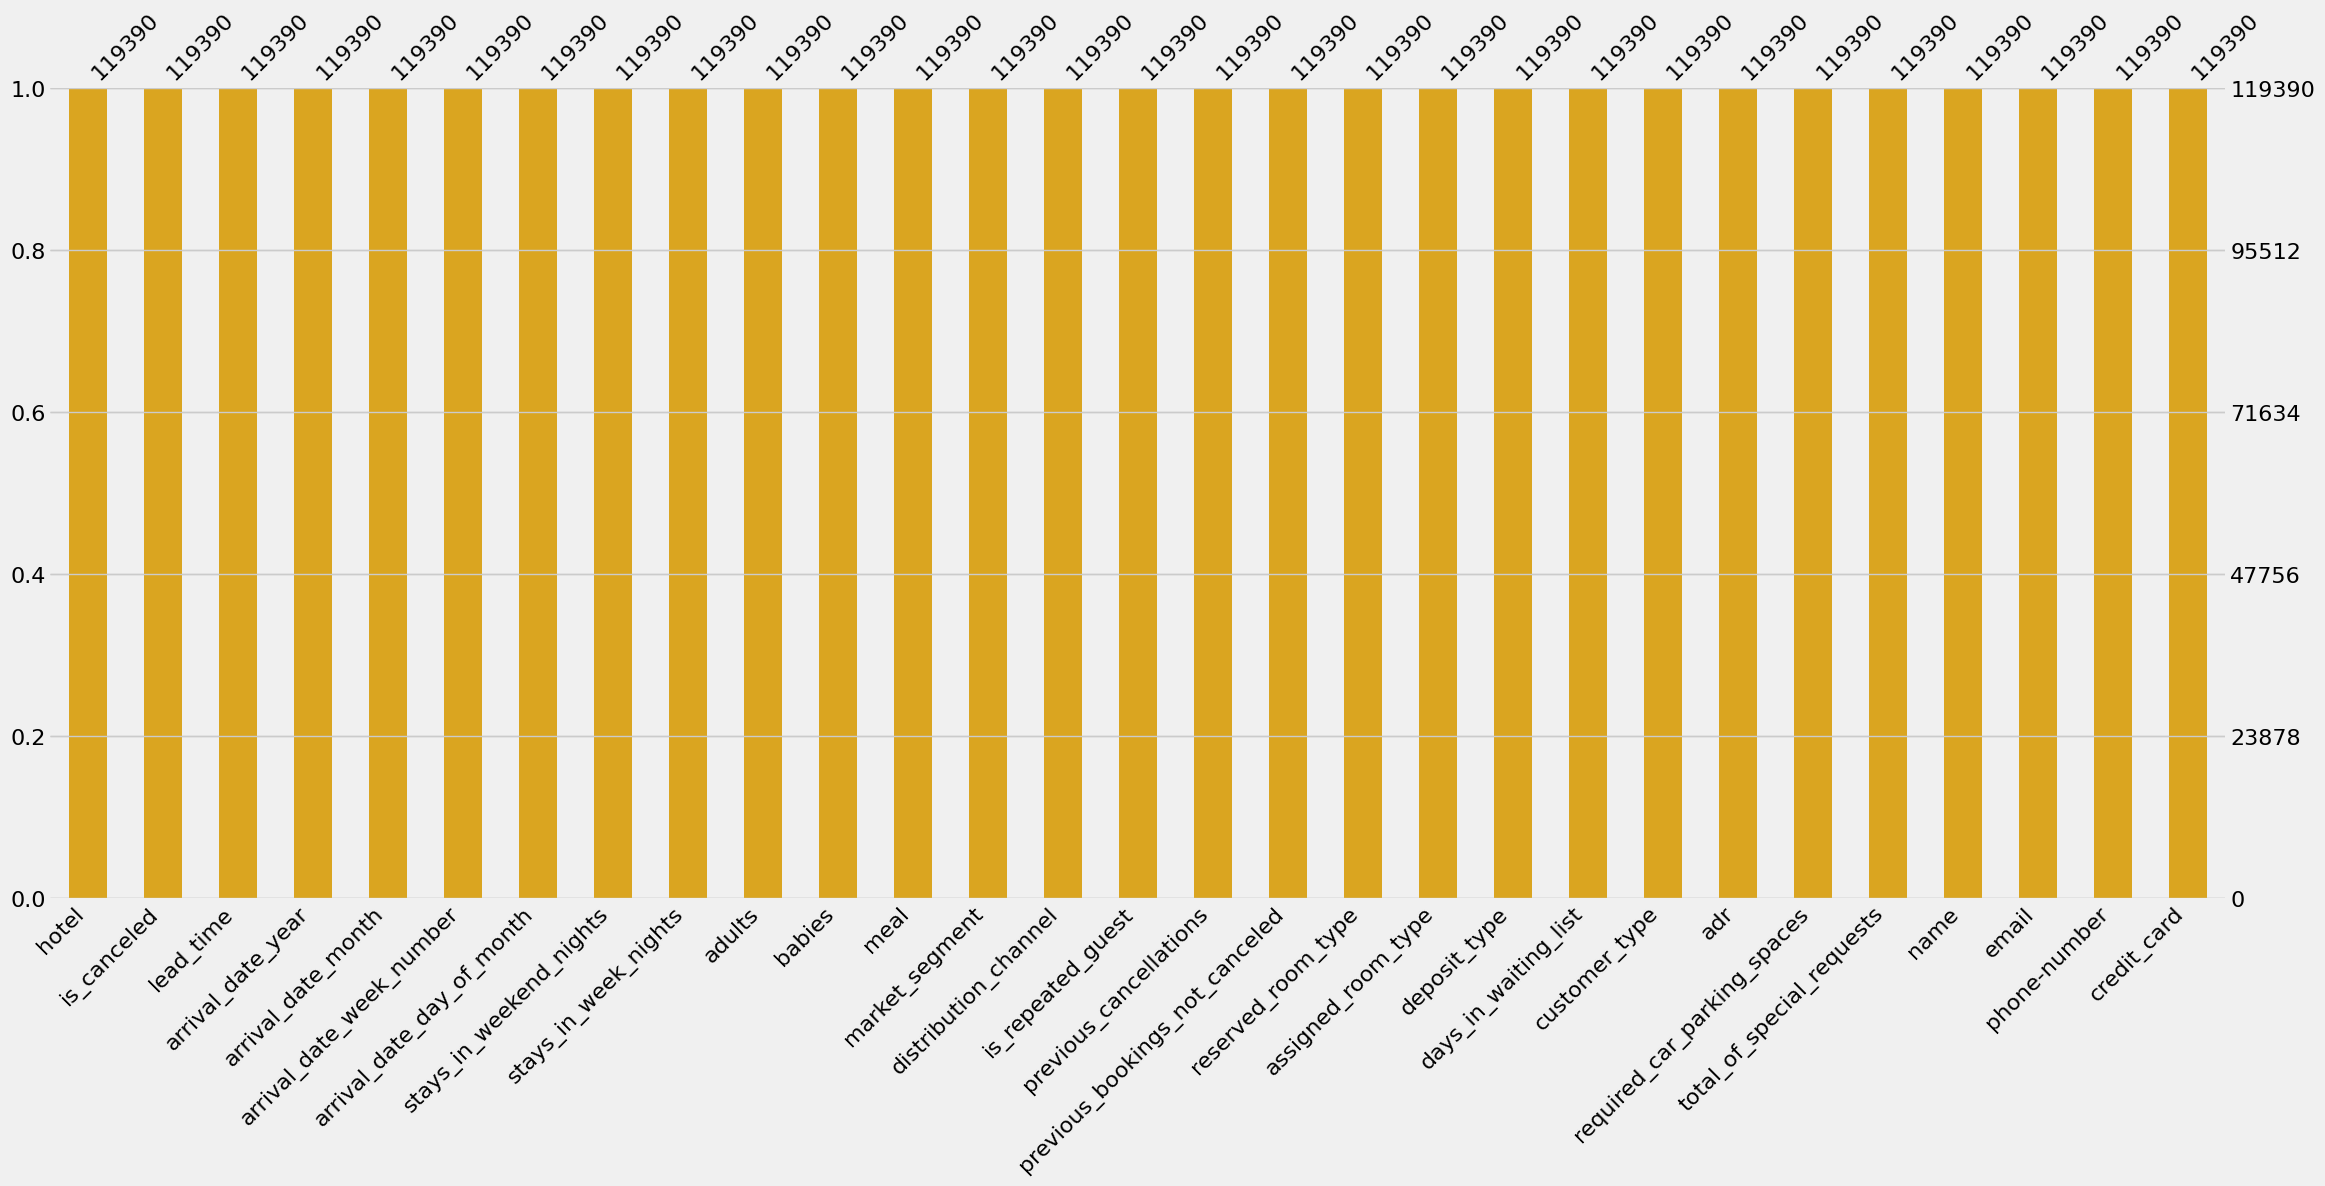

In [ ]:
# visualizing null values
msno.bar(df, color='#DAA520')
plt.show()

### Spliting columns to numerical and categorical

In [ ]:
numerical_columns = df.columns[df.dtypes != 'object'].tolist()
categorical_columns = df.columns[df.dtypes == 'object'].tolist()

### Definition of ANOVA test

In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

### Checking correlation with target variable for all numerical variables

In [ ]:
num_corr = FunctionAnova(df, 'is_canceled', numerical_columns)

##### ANOVA Results ##### 

is_canceled is correlated with is_canceled | P-Value: 0.0
lead_time is correlated with is_canceled | P-Value: 0.0
arrival_date_year is correlated with is_canceled | P-Value: 8.572485642241128e-09
arrival_date_week_number is correlated with is_canceled | P-Value: 0.0048715536408192
arrival_date_day_of_month is correlated with is_canceled | P-Value: 0.0341653150400735
stays_in_weekend_nights is NOT correlated with is_canceled | P-Value: 0.5360068238991778
stays_in_week_nights is correlated with is_canceled | P-Value: 1.1473295419809132e-17
adults is correlated with is_canceled | P-Value: 1.0785654472600046e-95
babies is NOT correlated with is_canceled | P-Value: 0.3318823322018669
is_repeated_guest is correlated with is_canceled | P-Value: 2.3127064758837656e-189
previous_cancellations is correlated with is_canceled | P-Value: 8.93266e-319
previous_bookings_not_canceled is correlated with is_canceled | P-Value: 1.4894651920729486e-87
days_in_waiting_list is co

### Definition of ChiSQ test

In [ ]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

### Checking correlation with target variable for all categorical variables

In [ ]:
cat_corr = FunctionChisq(df, 'is_canceled', categorical_columns)

hotel is correlated with is_canceled | P-Value: 0.0
arrival_date_month is correlated with is_canceled | P-Value: 3.6718226093273626e-119
meal is correlated with is_canceled | P-Value: 1.3212351959124216e-64
market_segment is correlated with is_canceled | P-Value: 0.0
distribution_channel is correlated with is_canceled | P-Value: 0.0
reserved_room_type is correlated with is_canceled | P-Value: 1.121956218424043e-133
assigned_room_type is correlated with is_canceled | P-Value: 0.0
deposit_type is correlated with is_canceled | P-Value: 0.0
customer_type is correlated with is_canceled | P-Value: 0.0
name is NOT correlated with is_canceled | P-Value: 0.20858898424416403
email is NOT correlated with is_canceled | P-Value: 0.45768266435458926
phone-number is NOT correlated with is_canceled | P-Value: 0.4986393073478576
credit_card is NOT correlated with is_canceled | P-Value: 0.8556470316825193


In [ ]:
df = df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

--------------
# Further Data Cleaning
--------------

### Checking if there are any rows with sum of adults and babies = 0 (if any, we have to drop them)

In [ ]:
df[(df.adults+df.babies==0)].shape

(180, 25)

In [ ]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies)==0].index)

### According to the documentation Undefined is exactly the same as SC, so we can map all of the values not to be consfused

In [ ]:
df['meal'] = df['meal'].map({'Undefined': 'SC', 'BB': 'BB', 'HB': 'HB', 'SC': 'SC', 'FB': 'FB'});
df['meal'].value_counts(ascending=False)

,count
meal,
BB,92236
HB,14458
SC,11718
FB,798


### Selecting all numerical variables and creating correlation heatmap for them

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
numerical_vars

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

<Axes: >

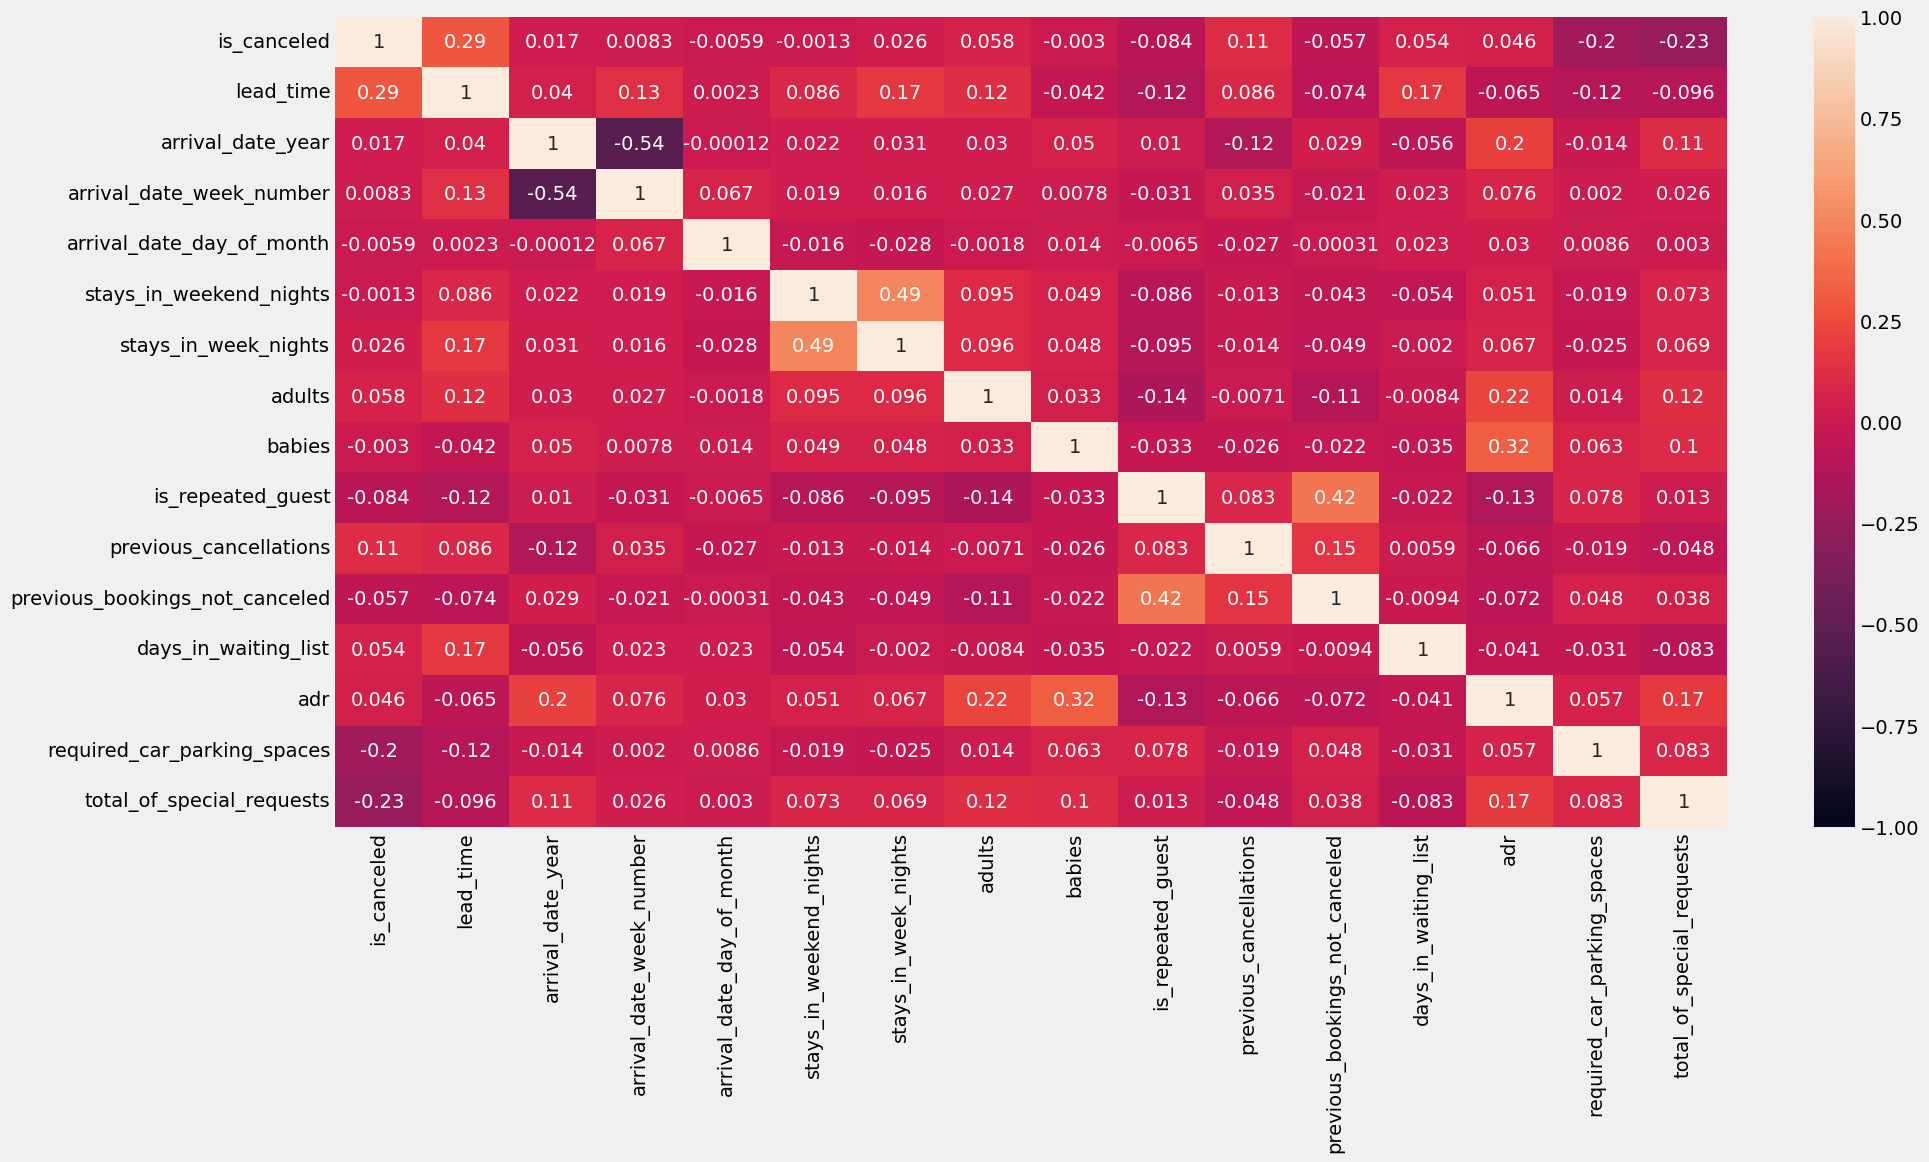

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numerical_vars].corr(), annot=True, vmax=1, vmin=-1)

Since arrival_date_year and arrival_date_week_number are highly correlated with each other and arrival_date_week_number is less correlated with target variable, we drop this column

In [ ]:
df = df.drop(['arrival_date_week_number'], axis=1)

### Creating Guest Number and Stay Length Columns

In [ ]:
df['guest_number'] = df['adults']  + df['babies']
df['guest_number'] = df['guest_number'].fillna(0)
df['stay_length'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.drop(['adults', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_day_of_month       119210 non-null  int64  
 6   meal                            119210 non-null  object 
 7   market_segment                  119210 non-null  object 
 8   distribution_channel            119210 non-null  object 
 9   is_repeated_guest               119210 non-null  int64  
 10  previous_cancellations          119210 non-null  int64  
 11  previous_bookings_not_canceled  119210 non-null  int64  
 12  reserved_room_type   

### Looking for rows with 0 guest number (if by any chance, we didn't delete them earlier) - if any --> delete

In [ ]:
df.loc[df['guest_number'] == 0, 'guest_number'].count()

0

In [ ]:
df.drop(df.loc[df['guest_number'] == 0].index, inplace=True)

### Looking for rows with 0 stay_length - if any --> delete

In [ ]:
df.loc[df['stay_length'] == 0, 'stay_length'].count()

645

In [ ]:
df.drop(df.loc[df['stay_length'] == 0].index, inplace=True)

As a rate measure adr is supposed to be above 0. Looking for values lesser or exual to 0:

In [ ]:
df['adr'].loc[df['adr'] <= 0].value_counts()

,count
adr,
0.00,1165
-6.38,1


### Checking how many % of the data has adr <= 0

In [ ]:
1166 / df.shape[0] * 100

0.9834268122970523

Since the data that we want to delete is only 1% of all data, we can simply cut it

In [ ]:
df = df.drop(df.loc[df['adr'] <= 0].index)

### Combining the date columns

In [ ]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + ' ' +
                                     df['arrival_date_month'] + ' ' +
                                     df['arrival_date_day_of_month'].astype(str))


df = df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'])

df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'guest_number', 'stay_length',
       'arrival_date'],
      dtype='object')

### Final info for cleaned dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117399 entries, 2 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117399 non-null  object        
 1   is_canceled                     117399 non-null  int64         
 2   lead_time                       117399 non-null  int64         
 3   meal                            117399 non-null  object        
 4   market_segment                  117399 non-null  object        
 5   distribution_channel            117399 non-null  object        
 6   is_repeated_guest               117399 non-null  int64         
 7   previous_cancellations          117399 non-null  int64         
 8   previous_bookings_not_canceled  117399 non-null  int64         
 9   reserved_room_type              117399 non-null  object        
 10  assigned_room_type              117399 non-null  object      

### Final checking if all of the columns are correlated with target variable

In [ ]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(exclude=['object', 'datetime']).columns.tolist()

# Selecting categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Running the FunctionAnova with 'is_canceled' as the target and numerical columns
FunctionAnova(df, 'is_canceled', numerical_columns)


##### ANOVA Results ##### 

is_canceled is correlated with is_canceled | P-Value: 0.0
lead_time is correlated with is_canceled | P-Value: 0.0
is_repeated_guest is correlated with is_canceled | P-Value: 2.737088934587094e-144
previous_cancellations is correlated with is_canceled | P-Value: 1.52519275e-316
previous_bookings_not_canceled is correlated with is_canceled | P-Value: 6.858906439248726e-79
days_in_waiting_list is correlated with is_canceled | P-Value: 8.009283805778226e-77
adr is correlated with is_canceled | P-Value: 2.1506407643408265e-25
required_car_parking_spaces is correlated with is_canceled | P-Value: 0.0
total_of_special_requests is correlated with is_canceled | P-Value: 0.0
guest_number is correlated with is_canceled | P-Value: 3.41527424652844e-42
stay_length is correlated with is_canceled | P-Value: 8.470135689657454e-05


['is_canceled',
 'lead_time',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'guest_number',
 'stay_length']

In [ ]:
FunctionChisq(df, 'is_canceled', categorical_columns)

hotel is correlated with is_canceled | P-Value: 0.0
meal is correlated with is_canceled | P-Value: 4.3841692123099185e-51
market_segment is correlated with is_canceled | P-Value: 0.0
distribution_channel is correlated with is_canceled | P-Value: 0.0
reserved_room_type is correlated with is_canceled | P-Value: 9.294648670602226e-133
assigned_room_type is correlated with is_canceled | P-Value: 0.0
deposit_type is correlated with is_canceled | P-Value: 0.0
customer_type is correlated with is_canceled | P-Value: 0.0


['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

-----------
# Preprocessing
-----------

In [ ]:
df['is_canceled'].value_counts() # Not balanced dataset

,count
is_canceled,
0,73388
1,44011


We know that we are dealing with an imbalanced dataset, where one class is significantly more represented than the other. This is important because it can affect the quality of machine learning models. Imbalanced data often leads to biased models that perform well on the majority class but poorly on the minority class. In such cases, models may have high overall accuracy, but this metric can be misleading as it masks poor performance on the underrepresented class.


### The number of canceled and non-canceled bookings and their percentages in a chart



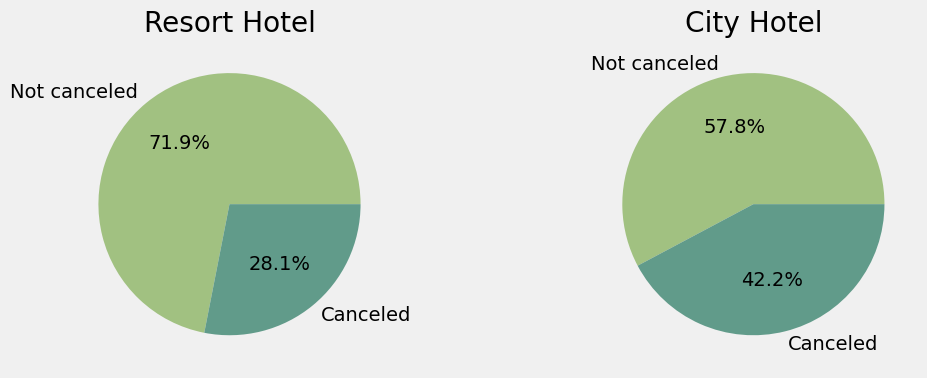

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Split the dataset into resort and city hotels
resort_h = df[df['hotel'] == 'Resort Hotel']
city_h = df[df['hotel'] == 'City Hotel']

# Count the number of cancellations for resort hotels
cancel_rh = resort_h['is_canceled'].value_counts().reset_index()
# Calculate the percentage of cancellations and non-cancellations for resort hotels
pie_values_rh = [cancel_rh.iloc[0, 1] / cancel_rh['is_canceled'].sum(),
                 cancel_rh.iloc[1, 1] / cancel_rh['is_canceled'].sum()]

# Count the number of cancellations for city hotels
cancel_ch = city_h['is_canceled'].value_counts().reset_index()
# Calculate the percentage of cancellations and non-cancellations for city hotels
pie_values_ch = [cancel_ch.iloc[0, 1] / cancel_ch['is_canceled'].sum(),
                 cancel_ch.iloc[1, 1] / cancel_ch['is_canceled'].sum()]

# Visualization of cancellations
colors = ['#a1c181', '#619b8a']  # Define colors for the pie charts
labels = ['Not canceled', 'Canceled']  # Define labels for the pie chart segments

fig = plt.figure(figsize=(12, 4))  # Create a figure for the plots

# Pie chart for resort hotels
ax = fig.add_subplot(121)  # Add a subplot for resort hotels
ax.pie(pie_values_rh, labels=labels, autopct='%1.1f%%', colors=colors)  # Create pie chart
ax.set_title('Resort Hotel')  # Set the title for resort hotel pie chart

# Pie chart for city hotels
ax = fig.add_subplot(122)  # Add a subplot for city hotels
ax.pie(pie_values_ch, labels=labels, autopct='%1.1f%%', colors=colors)  # Create pie chart
ax.set_title('City Hotel')  # Set the title for city hotel pie chart

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plots

# Free up memory by deleting temporary variables
del pie_values_rh, pie_values_ch, labels, fig, ax


We can see, based on both of the charts, that people cancel theirs reservations more often in the city hotels comparing to the resorts.

### Cancellation division

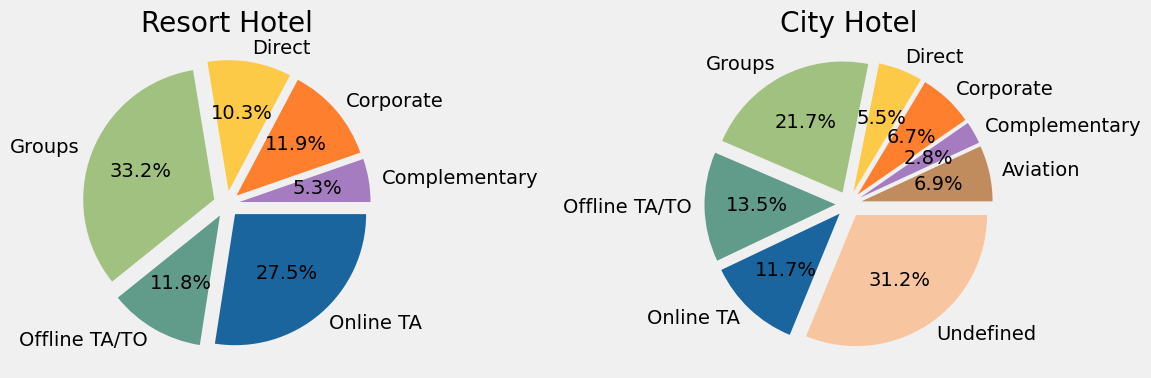

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Split the DataFrame into resort and city hotels
resort_h = df[df['hotel'] == 'Resort Hotel']
city_h = df[df['hotel'] == 'City Hotel']

# Calculate cancellation rates for each market segment
cancel_market_rh = resort_h.groupby('market_segment')['is_canceled'].agg(['count', 'sum'])
cancel_market_rh['cancel_rate'] = cancel_market_rh['sum'] / cancel_market_rh['count']

cancel_market_ch = city_h.groupby('market_segment')['is_canceled'].agg(['count', 'sum'])
cancel_market_ch['cancel_rate'] = cancel_market_ch['sum'] / cancel_market_ch['count']

# Visualization
colors_rh = ['#a57cbf', '#fe7f2d', '#fcca46', '#a1c181', '#619b8a', '#1a659e', '#f7c59f', '#ce796b', '#c18c5d']
colors_ch = ['#c18c5d', '#a57cbf', '#fe7f2d', '#fcca46', '#a1c181', '#619b8a', '#1a659e', '#f7c59f', '#ce796b']
labels_rh = cancel_market_rh.index  # Get market segments for resort hotels
labels_ch = cancel_market_ch.index  # Get market segments for city hotels

# Create explode arrays based on the number of segments
explode_rh = [0.1] * len(labels_rh)  # Set explode for all segments in resort hotel
explode_ch = [0.1] * len(labels_ch)  # Set explode for all segments in city hotel

fig = plt.figure(figsize=(12, 4))

# Pie chart for Resort Hotel
ax = fig.add_subplot(121)
ax.pie(cancel_market_rh['cancel_rate'], explode=explode_rh, labels=labels_rh, autopct='%1.1f%%', colors=colors_rh)
ax.set_title('Resort Hotel')

# Pie chart for City Hotel
ax = fig.add_subplot(122)
ax.pie(cancel_market_ch['cancel_rate'], explode=explode_ch, labels=labels_ch, autopct='%1.1f%%', colors=colors_ch)
ax.set_title('City Hotel')

plt.tight_layout()
plt.show()

# Clean up memory
del labels_rh, labels_ch, explode_rh, explode_ch, colors_rh, colors_ch


* Clear differences in market segment structure and cancellation rates can be seen between resort hotels and city hotels.

* In both types of hotels, direct bookings and those from online travel agencies (Online TA) are the dominant segments.

* Cancellation rates vary based on market segment and hotel type. For instance, in city hotels, a higher percentage of canceled bookings come from the "Groups" segment.

* City hotels show a greater variety in market segments, while resort hotels are dominated by two main segments.

### Cancellation rate by year and month

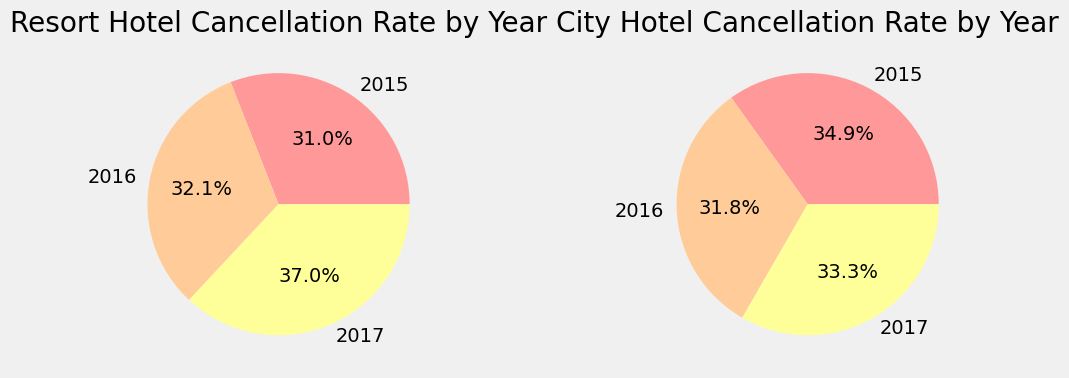

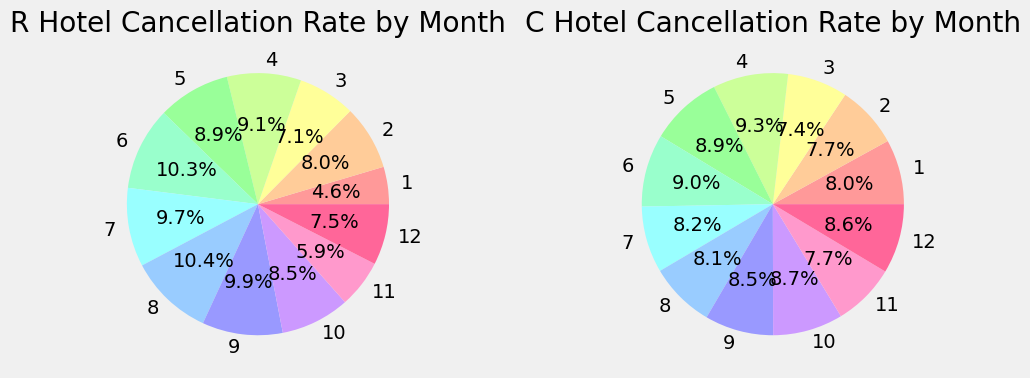

<Figure size 1200x1000 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Split the DataFrame into resort and city hotels
resort_h = df[df['hotel'] == 'Resort Hotel']
city_h = df[df['hotel'] == 'City Hotel']

# Calculate cancellation rates by year
cancel_year_rh = resort_h.groupby(resort_h['arrival_date'].dt.year)['is_canceled'].agg(['count', 'sum'])
cancel_year_rh['cancel_rate'] = cancel_year_rh['sum'] / cancel_year_rh['count']

cancel_year_ch = city_h.groupby(city_h['arrival_date'].dt.year)['is_canceled'].agg(['count', 'sum'])
cancel_year_ch['cancel_rate'] = cancel_year_ch['sum'] / cancel_year_ch['count']

# Calculate cancellation rates by month
cancel_month_rh = resort_h.groupby(resort_h['arrival_date'].dt.month)['is_canceled'].agg(['count', 'sum'])
cancel_month_rh['cancel_rate'] = cancel_month_rh['sum'] / cancel_month_rh['count']

cancel_month_ch = city_h.groupby(city_h['arrival_date'].dt.month)['is_canceled'].agg(['count', 'sum'])
cancel_month_ch['cancel_rate'] = cancel_month_ch['sum'] / cancel_month_ch['count']

# Define a palette with 12 distinct colors for the months
colors_months = ['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99FF99',
                 '#99FFCC', '#99FFFF', '#99CCFF', '#9999FF', '#CC99FF',
                 '#FF99CC', '#FF6699']

# Visualization for years
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart for Resort Hotel by Year
axs[0].pie(cancel_year_rh['cancel_rate'], labels=cancel_year_rh.index, autopct='%1.1f%%', colors=colors_months[:len(cancel_year_rh.index)])
axs[0].set_title('Resort Hotel Cancellation Rate by Year')

# Pie chart for City Hotel by Year
axs[1].pie(cancel_year_ch['cancel_rate'], labels=cancel_year_ch.index, autopct='%1.1f%%', colors=colors_months[:len(cancel_year_ch.index)])
axs[1].set_title('City Hotel Cancellation Rate by Year')

plt.tight_layout()
plt.show()

# Visualization for months
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart for Resort Hotel by Month
axs[0].pie(cancel_month_rh['cancel_rate'], labels=cancel_month_rh.index, autopct='%1.1f%%', colors=colors_months)
axs[0].set_title('R Hotel Cancellation Rate by Month')

# Pie chart for City Hotel by Month
axs[1].pie(cancel_month_ch['cancel_rate'], labels=cancel_month_ch.index, autopct='%1.1f%%', colors=colors_months)
axs[1].set_title('C Hotel Cancellation Rate by Month')

plt.tight_layout()
plt.figure(figsize=(12, 10))
plt.show()

# Clean up memory
del cancel_year_rh, cancel_year_ch, cancel_month_rh, cancel_month_ch


The cancellation rate in both resort and city hotels shows some variability over time, both on a yearly and monthly scale.

Annual Variability:

* Resort Hotels: The cancellation rate in resort hotels shows some year-to-year fluctuation. The highest percentage of canceled reservations was recorded in 2017.
* City Hotels: City hotels also show annual variability, though it is less pronounced than in resort hotels.


Monthly Variability:

* Resort Hotels: In resort hotels, the highest cancellation rates are in the summer months (June, July, August), which may be due to an increase in last-minute bookings and spontaneous trips.
* City Hotels: City hotels also show seasonal patterns in cancellations, though these are less distinct than those observed in resort hotels.


### Box plot of reserved room types

In [ ]:
import plotly.express as px
import pandas as pd

# Filter the data for non-canceled reservations and create a copy
data = df[df['is_canceled'] == 0].copy()

# Define the order of room types alphabetically
room_type_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L']

# Ensure 'reserved_room_type' is a categorical variable with a specified order
data['reserved_room_type'] = pd.Categorical(data['reserved_room_type'], categories=room_type_order, ordered=True)

# Create the box plot with room types sorted alphabetically
fig = px.box(data_frame=data,
              x='reserved_room_type',
              y='adr',
              color='hotel',
              template='plotly_dark',
              category_orders={'reserved_room_type': room_type_order})  # Explicitly specify order here

# Show the figure
fig.show()


Overall Price Distribution:

- Median Price: The box plots reveal that the median price for room type 'B' is significantly higher than other room types.

- Price Range: The width of the boxes indicates the range of room prices within each room type. Room types 'B' and 'H' show a wider price range compared to others.

- Outliers: The presence of outliers suggests that some rooms within certain categories have exceptionally high or low prices.


Price Comparison by Hotel:

- Resort Hotel: The Resort Hotel generally has higher prices compared to the City Hotel. This is evident from the position of the boxes and the presence of outliers in the higher price range.

- Room Type Variation: The price difference between room types is more pronounced in the Resort Hotel.

Skewness:

- Positive Skewness -  The longer whisker on the right side of the box plots for room types 'B' and 'H' indicates positive skewness, meaning there are more outliers with higher prices.

Additional Observations:
- Room Type 'A': This room type has the lowest price range and no outliers, suggesting consistent pricing.

- Room Type 'L': This room type has a relatively high price range and some outliers, indicating potential variations in pricing.

### ADR for city and resort hotels

In [ ]:
# Ensure the 'arrival_date' column is in datetime format
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# Extract month names without creating a new column
resort_hotel = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)].groupby(
    df['arrival_date'].dt.month_name()
)['adr'].mean().reset_index()

city_hotel = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)].groupby(
    df['arrival_date'].dt.month_name()
)['adr'].mean().reset_index()

# Merge both tables on the month
final_hotel = resort_hotel.merge(city_hotel, left_on='arrival_date', right_on='arrival_date')

# Rename the columns for clarity
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']

# Define the correct order of months for sorting
month_order = [
    'January', 'February', 'March', 'April', 'May',
    'June', 'July', 'August', 'September', 'October',
    'November', 'December'
]

# Sort the final DataFrame by the month order
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=month_order, ordered=True)
final_hotel = final_hotel.sort_values('month')

# Display the final DataFrame
final_hotel


,month,price_for_resort,price_for_city_hotel
4,January,50.241999,84.394886
3,February,55.395559,88.373857
7,March,58.329825,92.114529
0,April,77.602459,113.519264
8,May,78.547660,123.177602
6,June,109.917426,119.659087
5,July,152.801548,117.969667
1,August,183.687392,120.950735
11,September,97.577390,115.555526
10,October,63.577850,104.616456


The analysis of average daily rates (ADR) for resort and city hotels reveals seasonal price fluctuations on a monthly basis. This allows for the comparison of average prices across different months and the identification of peak and off-peak seasons. The results indicate which months have the highest and lowest prices and which type of hotel is generally more expensive. Seasonality is reflected in the amplitude of price variations, highlighting changes in demand for accommodations. Hoteliers can leverage this information to optimize pricing strategies and resource planning, influencing their marketing strategies as well. Customers can better plan their trips to take advantage of more favorable prices and choose hotels based on their needs and budgets.

In [ ]:
plt.figure(figsize = (17, 8))

px.line(final_hotel, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')


<Figure size 1700x800 with 0 Axes>

Seasonality:
- Resort Hotels: The graph clearly indicates a distinct seasonality in resort hotels. The number of guests increases from spring, peaking during the summer months, likely in July and August, before declining in the fall and winter. This pattern is typical for the tourism industry, reflecting tourists' preferences for summer vacations.
- City Hotels: In contrast, the seasonality in city hotels is less pronounced. There is a modest increase in guests during the summer, which may be attributed to urban tourism, but this trend is not as strong as that seen in resort hotels. This suggests that city hotels attract guests throughout the year, appealing to both tourists and business travelers.

Differences Between Hotel Types:
- Peaks and Valleys: The peaks and troughs in guest numbers occur in different months for each hotel type. Resort hotels experience a clear peak in the summer, while city hotels may see their peak during other times of the year, possibly aligned with cultural events or conferences.
- Demand Levels: Generally, resort hotels may exhibit greater fluctuations in guest numbers depending on the season, whereas city hotels tend to show more stable demand year-round.


### Total number of guests across the months

In [ ]:
# Ensure the 'arrival_date' column is in datetime format
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# Calculate the total number of guests for 'Resort Hotel' by month
resort_guests = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)].groupby(
    df['arrival_date'].dt.month_name()
)['guest_number'].sum().reset_index()

# Calculate the total number of guests for 'City Hotel' by month
city_guests = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)].groupby(
    df['arrival_date'].dt.month_name()
)['guest_number'].sum().reset_index()

# Merge both tables on the month
final_guests = resort_guests.merge(city_guests, left_on='arrival_date', right_on='arrival_date')

# Rename the columns for clarity
final_guests.columns = ['month', 'total_guests_resort', 'total_guests_city']

# Define the correct order of months for sorting
month_order = [
    'January', 'February', 'March', 'April', 'May',
    'June', 'July', 'August', 'September', 'October',
    'November', 'December'
]

# Sort the final DataFrame by the month order
final_guests['month'] = pd.Categorical(final_guests['month'], categories=month_order, ordered=True)
final_guests = final_guests.sort_values('month')

# Display the final DataFrame
final_guests


,month,total_guests_resort,total_guests_city
4,January,3093.0,3920.0
3,February,4217.0,5620.0
7,March,4518.0,7534.0
0,April,4599.0,8062.0
8,May,4750.0,8440.0
6,June,4056.0,8287.0
5,July,6938.0,10121.0
1,August,7427.0,11476.0
11,September,4130.0,7760.0
10,October,4682.0,7757.0


The analysis of total guest numbers in resort and city hotels on a monthly basis reveals important seasonal patterns. Both hotel types exhibit fluctuations in occupancy, but resort hotels show more pronounced seasonal variations, with higher guest counts during peak tourist seasons, particularly in the summer months. In contrast, city hotels tend to maintain a more consistent demand throughout the year, likely due to the presence of business travelers and tourists visiting urban areas. By comparing the total number of guests across months, we can identify clear peak and off-peak periods; resort hotels typically see their peak season in the summer, while off-peak months may occur during winter or shoulder seasons. City hotels may have their own peak periods that coincide with local events, conventions, or popular tourist attractions. This analysis enables a direct comparison of the popularity of each hotel type, highlighting months when one type significantly outperforms the other.


In [ ]:
import plotly.express as px

# Ensure the correct column names are used in the plot
fig = px.line(
    final_guests,
    x='month',
    y=['total_guests_resort', 'total_guests_city'],
    title='Total Number of Guests per Month',
    template='plotly_dark'
)

# Show the figure
fig.show()


Seasonality:
- Resort Hotels: A pronounced seasonal pattern is evident, with a significant peak in guest numbers during the summer months. This aligns with typical tourist behavior, where summer is a popular time for vacations.
- City Hotels: The seasonality is less pronounced, suggesting more consistent demand throughout the year. This could be attributed to business travel, conferences, or urban tourism, which may not be as influenced by seasonal factors.
Peak and Off-Peak Periods:
- Resort Hotels: The peak season for resort hotels occurs during the summer months, while the off-peak season is typically during the winter.
- City Hotels: City hotels may have peak periods associated with specific events, conferences, or holidays. However, the overall trend is more consistent compared to resort hotels.
Differences Between Hotel Types:
- Seasonal Variation: Resort hotels exhibit greater seasonal fluctuations, with significant increases during peak periods and decreases during off-peak periods. City hotels, on the other hand, show a more stable pattern.
- Demand Levels: Overall, resort hotels may experience higher peak demand but lower off-peak demand compared to city hotels. City hotels might have a more balanced distribution of guests throughout the year.

### Filtering

In [ ]:
filter = df['is_canceled'] == 0
data = df[filter]

This filtering process is useful for focusing on active bookings in the dataset, allowing for further analysis on confirmed reservations without the noise of canceled bookings


In [ ]:
stay = data.groupby(['stay_length', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})

The resulting DataFrame stay provides a clear overview of the number of stays categorized by both the length of stay and the type of hotel



### Frequency and length of stays

In [ ]:
px.bar(data_frame = stay, x = 'stay_length', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

The analysis of stay lengths in resort and city hotels shows that most guests opt for short stays, particularly one or two nights, indicating a significant number of business travelers and tourists on brief trips. Resort hotels attract more guests for longer stays, likely due to vacation preferences. However, both hotel types experience a rapid decline in guests as stay length increases, suggesting longer stays are rare.


### Corelation between numerical and targetvariable

In [ ]:
correlation = df[numerical_columns].corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

,is_canceled
is_canceled,1.000000
lead_time,0.290513
total_of_special_requests,0.237318
required_car_parking_spaces,0.197514
previous_cancellations,0.110667
is_repeated_guest,0.074545
previous_bookings_not_canceled,0.054843
days_in_waiting_list,0.054103
guest_number,0.039711
adr,0.030386


We calculate the correlation between various numerical features and the target variable "is_canceled:

- Lead Time: A strong positive correlation between lead time and cancellation rate suggests that bookings made further in advance are more likely to be canceled. This could be due to various reasons, such as changes in plans or uncertainty about future commitments.
- Total of Special Requests: A moderate positive correlation indicates that a higher number of special requests may increase the likelihood of cancellation. This could be because guests with special requests might be more demanding or have higher expectations, which can lead to dissatisfaction and cancellations if not met.
- Required Car Parking Spaces: A moderate positive correlation suggests that guests requiring car parking spaces might be more likely to cancel their reservations. This could be due to limited availability of parking spaces or changes in transportation plans.
- Previous Cancellations: A moderate positive correlation indicates that guests with a history of cancellations are more likely to cancel future bookings. This could be due to various factors, such as unreliable travel plans or a tendency to overbook.
- Other Factors: The remaining variables have a weaker correlation with cancellation rates. Factors like guest number, ADR, and stay length seem to have a minimal impact on the likelihood of cancellation.


--------------
# Encoding, scaling, nomralizing
--------------

### Spliting the data for encoding categorical variables and normalizing numerical ones

In [ ]:
numerical_columns = df.select_dtypes(exclude=['object', 'datetime']).columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()

In [ ]:
df_cat = df[categorical_columns]
df_num = df[numerical_columns]

### Seeing all unique values for each categorical column

In [ ]:
# printing unique values of each column
for col in df_cat.columns:
    print(f"{col}: \n{df_cat[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Groups' 'Complementary'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['A' 'C' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

assigned_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']



### Encoding categorical variables

In [ ]:
df_cat['hotel'] = df_cat['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})
df_cat['meal'] = df_cat['meal'].map({'BB': 0, 'HB': 1, 'FB': 2, 'SC': 3, 'Undefined': 4})
df_cat['market_segment'] = df_cat['market_segment'].map({'Online TA': 0, 'Offline TA/TO':
                                                         1, 'Groups': 2, 'Direct': 3,
                                                         'Corporate': 4, 'Complementary': 5,
                                                         'Aviation': 6, 'Undefined': 7})
df_cat['distribution_channel'] = df_cat['distribution_channel'].map({'TA/TO': 0, 'Direct':
                                                                     1, 'Corporate': 2,
                                                                    'GDS': 3, 'Undefined': 4})
df_cat['deposit_type'] = df_cat['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1,
                                                      'Refundable': 2, 'Undefined': 3})
df_cat['customer_type'] = df_cat['customer_type'].map({'Transient': 0, 'Transient-Party': 1,
                                                        'Contract': 2, 'Group': 3})

df_cat['reserved_room_type'] = df_cat['reserved_room_type'].map({'A': 0, 'D':3, 'E': 4, 'G':6, 'F':5, 'C':2, 'B':1, 'H':7, 'L':8})

df_cat['assigned_room_type'] = df_cat['assigned_room_type'].map({'A': 0, 'D':3, 'E': 4, 'G':6, 'F':5, 'C':2, 'B':1, 'H':7, 'I':8, 'K':9, 'L':10})




### First 5 rows of DataFrame with encoded categorical variables

In [ ]:
df_cat.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
2,0,0,3,1,0,2,0,0
3,0,0,4,2,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,3,1,2,2,0,0


### Dropping the target variable from the numerical DataFrame

In [ ]:
df_num = df_num.drop(columns=['is_canceled'])

### The variance for all numerical features

In [ ]:
df_num.var()

,0
lead_time,11430.508914
is_repeated_guest,0.027086
previous_cancellations,0.720456
previous_bookings_not_canceled,2.091370
days_in_waiting_list,312.559275
adr,2419.944474
required_car_parking_spaces,0.060287
total_of_special_requests,0.626689
guest_number,0.418012
stay_length,6.397173


Since the varaiance for `lead_time`, `days_in_waiting_list` and `adr` are very high, we should normalize them. For this case we use log + 1 scaling

In [ ]:
df_num['lead_time'] = np.log(df_num['lead_time'] + 1)
df_num['days_in_waiting_list'] = np.log(df_num['days_in_waiting_list'] + 1)
df_num['adr'] = np.log(df_num['adr'] + 1)

In [ ]:
df_num.var()

,0
lead_time,2.520964
is_repeated_guest,0.027086
previous_cancellations,0.720456
previous_bookings_not_canceled,2.091370
days_in_waiting_list,0.507638
adr,0.208900
required_car_parking_spaces,0.060287
total_of_special_requests,0.626689
guest_number,0.418012
stay_length,6.397173


We can see that variance is much smaller now, so our numerical variables can be considered as balanced

### Merging DataFrames with encoded categorical and scaled numerical variables

In [ ]:
df_ready = pd.concat([df_cat, df_num], axis = 1)

In [ ]:
df_ready.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guest_number,stay_length
2,0,0,3,1,0,2,0,0,2.079442,0,0,0,0.0,4.330733,0,0,1.0,1
3,0,0,4,2,0,0,0,0,2.639057,0,0,0,0.0,4.330733,0,0,1.0,1
4,0,0,0,0,0,0,0,0,2.708050,0,0,0,0.0,4.595120,0,1,2.0,2
5,0,0,0,0,0,0,0,0,2.708050,0,0,0,0.0,4.595120,0,1,2.0,2
6,0,0,3,1,2,2,0,0,0.000000,0,0,0,0.0,4.682131,0,0,2.0,2


### Adding the column arrive_date (date type) from previous df

In [ ]:
df_ready['arrive_date'] = df['arrival_date']

In [ ]:
df_ready.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guest_number,stay_length,arrive_date
2,0,0,3,1,0,2,0,0,2.079442,0,0,0,0.0,4.330733,0,0,1.0,1,2015-07-01
3,0,0,4,2,0,0,0,0,2.639057,0,0,0,0.0,4.330733,0,0,1.0,1,2015-07-01
4,0,0,0,0,0,0,0,0,2.708050,0,0,0,0.0,4.595120,0,1,2.0,2,2015-07-01
5,0,0,0,0,0,0,0,0,2.708050,0,0,0,0.0,4.595120,0,1,2.0,2,2015-07-01
6,0,0,3,1,2,2,0,0,0.000000,0,0,0,0.0,4.682131,0,0,2.0,2,2015-07-01


### Dividing the arrive_date to 3 different columns --> year, month, day

In [ ]:
df_ready['year'] = df_ready['arrive_date'].dt.year
df_ready['month'] = df_ready['arrive_date'].dt.month
df_ready['day'] = df_ready['arrive_date'].dt.day
df_ready.drop(columns=['arrive_date'], inplace=True)


This type of column dividing is okay, because the result is a numerical variable

### Finaly - adding the target variable

In [ ]:
df_ready['is_canceled'] = df['is_canceled']

In [ ]:
df_ready.head(1)

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guest_number,stay_length,year,month,day,is_canceled
2,0,0,3,1,0,2,0,0,2.079442,0,0,0,0.0,4.330733,0,0,1.0,1,2015,7,1,0


Since all of the columns are numerical now, we will use only ANOVA test to check if there are any columns not correlated with target one

In [ ]:
FunctionAnova(df_ready, 'is_canceled', df_ready.columns)

##### ANOVA Results ##### 

hotel is correlated with is_canceled | P-Value: 0.0
meal is correlated with is_canceled | P-Value: 0.0242003065755606
market_segment is correlated with is_canceled | P-Value: 8.570190947027127e-68
distribution_channel is correlated with is_canceled | P-Value: 0.0
reserved_room_type is correlated with is_canceled | P-Value: 2.0256752332101916e-101
assigned_room_type is correlated with is_canceled | P-Value: 0.0
deposit_type is correlated with is_canceled | P-Value: 0.0
customer_type is correlated with is_canceled | P-Value: 0.0
lead_time is correlated with is_canceled | P-Value: 0.0
is_repeated_guest is correlated with is_canceled | P-Value: 2.737088934587094e-144
previous_cancellations is correlated with is_canceled | P-Value: 1.52519275e-316
previous_bookings_not_canceled is correlated with is_canceled | P-Value: 6.858906439248726e-79
days_in_waiting_list is correlated with is_canceled | P-Value: 3.241666378291946e-210
adr is correlated with is_canceled | P

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'lead_time',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'guest_number',
 'stay_length',
 'year',
 'month',
 'day',
 'is_canceled']

All columns are correlated and important, to see how much are they correlated we can create a table with Pearson Coefficients

In [ ]:
df_ready.corr()['is_canceled'].abs().sort_values(ascending = False)

,is_canceled
is_canceled,1.000000
deposit_type,0.468523
lead_time,0.317230
total_of_special_requests,0.237318
required_car_parking_spaces,0.197514
assigned_room_type,0.172225
distribution_channel,0.153905
hotel,0.137863
customer_type,0.124390
previous_cancellations,0.110667


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler

def lasso_regularization(df):

    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    scaler.fit(X_train)

    # fit a Logistic Regression model and feature selection altogether
    # select the Lasso (l1) penalty.
    # The selectFromModel class from sklearn, selects the features which coefficients are non-zero

    sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

    sel_.fit(scaler.transform(X_train), y_train)

    # make a list with the selected features
    selected_feat = X_train.columns[(sel_.get_support())]

    print("Number of features which coefficient was shrank to zero: ", np.sum(sel_.estimator_.coef_ == 0))
    # identify the removed features like this:
    removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
    print(removed_feats)

    # transform data
    X_lasso = pd.DataFrame(sel_.transform(scaler.transform(X)), columns=selected_feat)

    return X_lasso

In [ ]:
print(lasso_regularization(df_ready))

Number of features which coefficient was shrank to zero:  0
Index([], dtype='object')
           hotel      meal  market_segment  distribution_channel  \
0      -1.412059 -0.468139        1.592336              1.407264   
1      -1.412059 -0.468139        2.405058              3.239328   
2      -1.412059 -0.468139       -0.845830             -0.424801   
3      -1.412059 -0.468139       -0.845830             -0.424801   
4      -1.412059 -0.468139        1.592336              1.407264   
...          ...       ...             ...                   ...   
117394  0.708186 -0.468139       -0.033108             -0.424801   
117395  0.708186 -0.468139       -0.845830             -0.424801   
117396  0.708186 -0.468139       -0.845830             -0.424801   
117397  0.708186 -0.468139       -0.845830             -0.424801   
117398  0.708186  0.616533       -0.845830             -0.424801   

        reserved_room_type  assigned_room_type  deposit_type  customer_type  \
0                -

-----------
# Creation of models using Data Mining Algorithms
-----------

### Final info for ready dataset

In [ ]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117399 entries, 2 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117399 non-null  int64  
 1   meal                            117399 non-null  int64  
 2   market_segment                  117399 non-null  int64  
 3   distribution_channel            117399 non-null  int64  
 4   reserved_room_type              117399 non-null  int64  
 5   assigned_room_type              117399 non-null  int64  
 6   deposit_type                    117399 non-null  int64  
 7   customer_type                   117399 non-null  int64  
 8   lead_time                       117399 non-null  float64
 9   is_repeated_guest               117399 non-null  int64  
 10  previous_cancellations          117399 non-null  int64  
 11  previous_bookings_not_canceled  117399 non-null  int64  
 12  days_in_waiting_list 

In [ ]:
df_ready.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guest_number,stay_length,year,month,day,is_canceled
2,0,0,3,1,0,2,0,0,2.079442,0,0,0,0.0,4.330733,0,0,1.0,1,2015,7,1,0
3,0,0,4,2,0,0,0,0,2.639057,0,0,0,0.0,4.330733,0,0,1.0,1,2015,7,1,0
4,0,0,0,0,0,0,0,0,2.708050,0,0,0,0.0,4.595120,0,1,2.0,2,2015,7,1,0
5,0,0,0,0,0,0,0,0,2.708050,0,0,0,0.0,4.595120,0,1,2.0,2,2015,7,1,0
6,0,0,3,1,2,2,0,0,0.000000,0,0,0,0.0,4.682131,0,0,2.0,2,2015,7,1,0


In [ ]:
df_ready.shape, df_ready.size

((117399, 22), 2582778)

-------------

### Selecting numerical columns, setting up undersampling - in this case NearMiss and dividing dataset to features (X) and target variable (y)

In [ ]:
numerical_cols = df_ready.select_dtypes(include=['int64', 'float64']).columns.to_list()
if 'is_canceled' in numerical_cols:
    numerical_cols.remove('is_canceled')
underS = NearMiss(sampling_strategy='auto')
#underS = RandomUnderSampler(random_state=42)
X = df_ready.drop('is_canceled', axis=1)
y = df_ready['is_canceled']
#X, y= underS.fit_resample(X, y)



### KNN model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



X_train, y_train = underS.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=35)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nKNN model\n")
print(f"Accuracy: {accuracy_knn}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report\n:")
print(class_report)


KNN model

Accuracy: 0.7750425894378195

Confusion Matrix:
[[11869  2809]
 [ 2473  6329]]

Classification Report
:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     14678
           1       0.69      0.72      0.71      8802

    accuracy                           0.78     23480
   macro avg       0.76      0.76      0.76     23480
weighted avg       0.78      0.78      0.78     23480



The KNN model achieved an accuracy of 0.775, indicating that it correctly classified 77.5% of the instances in the dataset.

The confusion matrix provides a more detailed breakdown of the model's performance. It shows that:

- The model correctly classified 11869 instances of class 0 and 6329 instances of class 1.

- However, it misclassified 2809 instances of class 0 as class 1, and 2473 instances of class 1 as class 0.


The classification report offers additional metrics for evaluating the model's performance:

- Precision: The precision for class 0 is 0.83, meaning that of all instances predicted as class 0, 83% were actually class 0. Similarly, the precision for class 1 is 0.69.

- Recall: The recall for class 0 is 0.81, meaning that the model correctly identified 81% of all actual instances of class 0. The recall for class 1 is 0.72.

- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of both. The F1-score for class 0 is 0.82, and for class 1 is 0.71.

Overall, the model appears to be performing reasonably well, with a balanced accuracy across both classes. However, further analysis could be conducted to improve its performance, such as:

### SVM model

In [ ]:
svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Model Results:")
print(f"Accuracy: {accuracy_svm}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)


SVM Model Results:
Accuracy: 0.7704855195911414

Confusion Matrix:
[[12062  2616]
 [ 2773  6029]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     14678
           1       0.70      0.68      0.69      8802

    accuracy                           0.77     23480
   macro avg       0.76      0.75      0.75     23480
weighted avg       0.77      0.77      0.77     23480



The SVM model achieved an accuracy of 77.05%. This means it correctly classified 77.05% of the instances.

The confusion matrix provides more details about the model's errors: it correctly classified 12062 instances of class 0 and 6029 of class 1, but misclassified 2616 and 2773 instances respectively.

The classification report offers additional metrics:

- Precision: The model is more precise for class 0 (81%) than for class 1 (70%).
- Recall: The model has slightly higher recall for class 0 (82%) than for class 1 (68%).


Overall, the model performs reasonably well, but there's room for improvement, especially for class 1.

### Naive-Bayes model

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"Accuracy (Naive Bayes): {accuracy_nb}")
print("\nConfusion Matrix (Naive Bayes):")
print(conf_matrix_nb)
print("\nClassification Report (Naive Bayes):")
print(class_report_nb)


Accuracy (Naive Bayes): 0.7124361158432708

Confusion Matrix (Naive Bayes):
[[12126  2552]
 [ 4200  4602]]

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     14678
           1       0.64      0.52      0.58      8802

    accuracy                           0.71     23480
   macro avg       0.69      0.67      0.68     23480
weighted avg       0.71      0.71      0.71     23480



Naive Bayes Model Results:

- The model correctly classified 71.24% of the instances.

Confusion Matrix:
- The model correctly classified 12126 instances of class 0 and 4602 of class 1.

- It misclassified 2552 instances of class 0 and 4200 of class 1.

Classification Report:
- Precision: The model is more precise for class 0 (74%) than for class 1 (64%).

- Recall: The model has higher recall for class 0 (83%) compared to class 1 (52%).


Overall, the model achieved a reasonable accuracy, but it performs better for class 0 than for class 1.

### Logistic Regression model

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print(f"Accuracy (Logistic Regression): {accuracy_lr}")
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_lr)
print("\nClassification Report (Logistic Regression):")
print(class_report_lr)



Accuracy (Logistic Regression): 0.7668654173764906

Confusion Matrix (Logistic Regression):
[[12357  2321]
 [ 3153  5649]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     14678
           1       0.71      0.64      0.67      8802

    accuracy                           0.77     23480
   macro avg       0.75      0.74      0.75     23480
weighted avg       0.76      0.77      0.76     23480



The Logistic Regression model correctly classified 76.86% of the instances.

Confusion Matrix:
- The model correctly classified 12357 instances of class 0 and 5649 of class 1.

- It misclassified 2321 instances of class 0 and 3153 of class 1.

Classification Report:
- Precision: The model is more precise for class 0 (80%) than for class 1 (71%).

- Recall: The model has higher recall for class 0 (84%) compared to class 1 (64%).


Overall, the model achieved a good accuracy, and it performs better for class 0 than for class 1.

### Bagging Classifier model

In [ ]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_report_bagging = classification_report(y_test, y_pred_bagging)

print(f"Accuracy (Bagging Classifier): {accuracy_bagging}")
print("\nConfusion Matrix (Bagging Classifier):")
print(conf_matrix_bagging)
print("\nClassification Report (Bagging Classifier):")
print(class_report_bagging)

Accuracy (Bagging Classifier): 0.7921635434412265

Confusion Matrix (Bagging Classifier):
[[11740  2938]
 [ 1942  6860]]

Classification Report (Bagging Classifier):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     14678
           1       0.70      0.78      0.74      8802

    accuracy                           0.79     23480
   macro avg       0.78      0.79      0.78     23480
weighted avg       0.80      0.79      0.79     23480



The Bagging Classifier model correctly classified 79.22% of the instances.

Confusion Matrix:
 - The model correctly classified 11740 instances of class 0 and 6860 of class 1.

- It misclassified 2938 instances of class 0 and 1942 of class 1.

Classification Report:

 - Precision: The model is more precise for class 0 (86%) than for class 1 (70%).

 - Recall: The model has higher recall for class 0 (80%) compared to class 1 (78%).


Overall, the model achieved a very good accuracy, and it performs well for both classes.

### Random Forest model

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf}")
print("\nConfusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("\nClassification Report (Random Forest):")
print(class_report_rf)


Accuracy (Random Forest): 0.8130323679727428

Confusion Matrix (Random Forest):
[[11950  2728]
 [ 1662  7140]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     14678
           1       0.72      0.81      0.76      8802

    accuracy                           0.81     23480
   macro avg       0.80      0.81      0.80     23480
weighted avg       0.82      0.81      0.81     23480



The Random Forest model correctly classified 81.33% of the instances.

Confusion Matrix:

- The model correctly classified 11950 instances of class 0 and 7140 of class 1.

- It misclassified 2728 instances of class 0 and 1662 of class 1.

Classification Report:

- Precision: The model is more precise for class 0 (88%) than for class 1 (72%).

- Recall: The model has higher recall for class 0 (81%) compared to class 1 (81%).

Overall, the model achieved a very good accuracy, and it performs well for both classes.

### AdaBoost model

In [ ]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
class_report_adaboost = classification_report(y_test, y_pred_adaboost)

print(f"Accuracy (AdaBoost): {accuracy_adaboost}")
print("\nConfusion Matrix (AdaBoost):")
print(conf_matrix_adaboost)
print("\nClassification Report (AdaBoost):")
print(class_report_adaboost)

Accuracy (AdaBoost): 0.773381601362862

Confusion Matrix (AdaBoost):
[[12165  2513]
 [ 2808  5994]]

Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     14678
           1       0.70      0.68      0.69      8802

    accuracy                           0.77     23480
   macro avg       0.76      0.75      0.76     23480
weighted avg       0.77      0.77      0.77     23480



The AdaBoost model correctly classified 77.33% of the instances.

Confusion Matrix:

- The model correctly classified 12165 instances of class 0 and 5994 of class 1.

- It misclassified 2513 instances of class 0 and 2808 of class 1.

Classification Report:

- Precision: The model is more precise for class 0 (81%) than for class 1 (70%).

- Recall: The model has higher recall for class 0 (83%) compared to class 1 (68%).

Overall, the model achieved a good accuracy, and it performs well for both classes.

### Gradient Boost model

In [ ]:
gradientboost_model = GradientBoostingClassifier(random_state=42)
gradientboost_model.fit(X_train, y_train)

y_pred_gradientboost = gradientboost_model.predict(X_test)

accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
conf_matrix_gradientboost = confusion_matrix(y_test, y_pred_gradientboost)
class_report_gradientboost = classification_report(y_test, y_pred_gradientboost)

print(f"Accuracy (Gradient Boosting): {accuracy_gradientboost}")
print("\nConfusion Matrix (Gradient Boosting):")
print(conf_matrix_gradientboost)
print("\nClassification Report (Gradient Boosting):")
print(class_report_gradientboost)

Accuracy (Gradient Boosting): 0.7890119250425894

Confusion Matrix (Gradient Boosting):
[[12576  2102]
 [ 2852  5950]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     14678
           1       0.74      0.68      0.71      8802

    accuracy                           0.79     23480
   macro avg       0.78      0.77      0.77     23480
weighted avg       0.79      0.79      0.79     23480



The Gradient Boosting model correctly classified 78.90% of the instances.

Confusion Matrix:

- The model correctly classified 12576 instances of class 0 and 5950 of class 1.

- It misclassified 2102 instances of class 0 and 2852 of class 1.

Classification Report:

- Precision: The model is more precise for class 0 (82%) than for class 1 (74%).

- Recall: The model has higher recall for class 0 (86%) compared to class 1 (68%).

Overall, the model achieved a very good accuracy, and it performs well for both classes.

### XGBoost model

In [ ]:
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
class_report_xgboost = classification_report(y_test, y_pred_xgboost)

print(f"Accuracy (XGBoost): {accuracy_xgboost}")
print("\nConfusion Matrix (XGBoost):")
print(conf_matrix_xgboost)
print("\nClassification Report (XGBoost):")
print(class_report_xgboost)

Accuracy (XGBoost): 0.7834752981260648

Confusion Matrix (XGBoost):
[[11635  3043]
 [ 2041  6761]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     14678
           1       0.69      0.77      0.73      8802

    accuracy                           0.78     23480
   macro avg       0.77      0.78      0.77     23480
weighted avg       0.79      0.78      0.79     23480



The XGBoost model correctly classified 78.35% of the instances.

Confusion Matrix:

 - The model correctly classified 11635 instances of class 0 and 6761 of class 1.

- It misclassified 3043 instances of class 0 and 2041 of class 1.

Classification Report:
- Precision: The model is more precise for class 0 (85%) than for class 1 (69%).

- Recall: The model has higher recall for class 0 (79%) compared to class 1 (77%).

Overall, the model achieved a very good accuracy, and it performs well for both classes.

### Light GBM model

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

print(f"Accuracy (LightGBM): {accuracy_lgb}")
print("\nConfusion Matrix (LightGBM):")
print(conf_matrix_lgb)
print("\nClassification Report (LightGBM):")
print(class_report_lgb)

[LightGBM] [Info] Number of positive: 35209, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 70418, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy (LightGBM): 0.7821124361158432

Confusion Matrix (LightGBM):
[[11883  2795]
 [ 2321  6481]]

Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.84      0.81      0.82     14678
           1       0.70      0.74      0.72      8802

    accuracy                           0.78     23480
   macro avg       0.77      0.77      0.77     23480
weighted avg       0.78      0.78      0.78     23480



The LightGBM model correctly classified 77.78% of the instances.

Confusion Matrix:
 - The model correctly classified 11883 instances of class 0 and 6481 of class 1.

 - It misclassified 2795 instances of class 0 and 2321 of class 1.

Classification Report:

- Precision: The model is more precise for class 0 (84%) than for class 1 (70%).

- Recall: The model has higher recall for class 0 (81%) compared to class 1 (74%).

Overall, the model achieved a good accuracy, and it performs well for both classes.

In [ ]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
models.append(('NB',GaussianNB()))
models.append(('BC',BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('XB', XGBClassifier()))
models.append(('LB',LGBMClassifier()))
models.append(('SVM', SVC()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []
values = []

for name, model in models:
    kfold = KFold(n_splits=50, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    values.append(round(cv_results.mean(), 2))
    print(f'{name} : {cv_results.mean()} : {cv_results.std()}')

LR : 0.7402940915542938 : 0.010063916134076731
KNN : 0.7821008109394154 : 0.009499678088346017
NB : 0.7031015912316925 : 0.012067321092894424
BC : 0.8227720538421832 : 0.010153025547445281
RF : 0.8372715477611459 : 0.00866457596042672
AB : 0.761808574343506 : 0.01144216165994522
XB : 0.8112703138105686 : 0.01118756438715929
[LightGBM] [Info] Number of positive: 34533, number of negative: 34476
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 69009, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500413 -> initscore=0.001652
[LightGBM] [Info] Start training from score 0.001652
[LightGBM] [Info] Number of positive: 34503, number of negative: 34506
[LightGBM] [Info] Auto-choosing row-wise multi-t

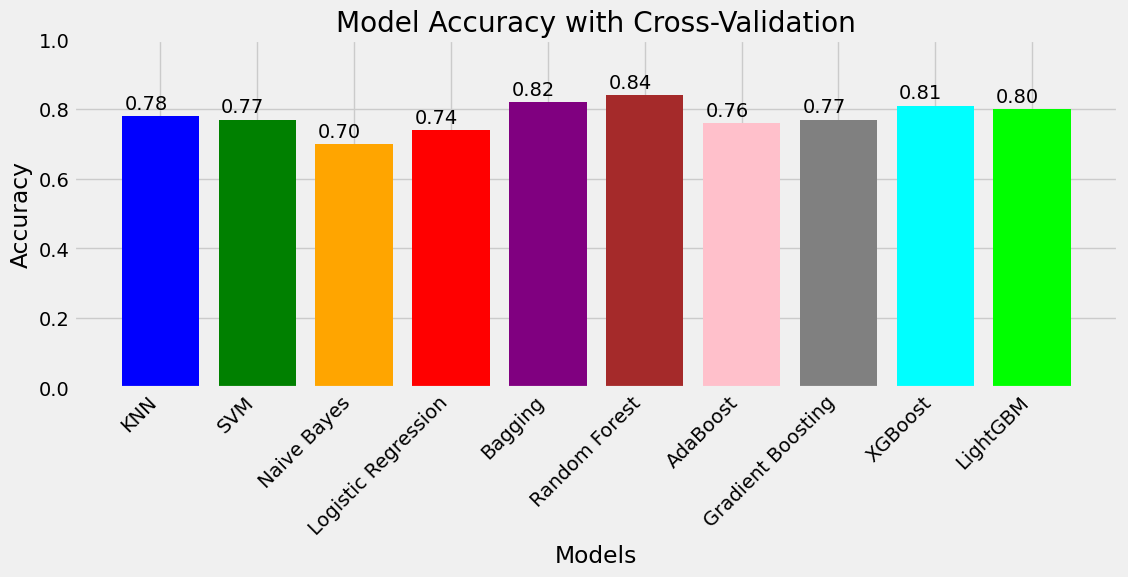

In [ ]:
accuracies = {
    'KNN': values[1],
    'SVM': values[8],
    'Naive Bayes': values[2],
    'Logistic Regression': values[0],
    'Bagging': values[3],
    'Random Forest': values[4],
    'AdaBoost': values[5],
    'Gradient Boosting': values[9],
    'XGBoost': values[6],
    'LightGBM': values[7]
}

colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'lime']

plt.figure(figsize=(12, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.title('Model Accuracy with Cross-Validation')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar, value in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{value:.2f}', ha='center', color='black')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.show()

# Neural Network Model for Project MINDD

## Introduction

In this project, we designed an adaptive neural network model to classify cancellations in the dataset using a flexible and optimized approach. By leveraging data preprocessing, cross-validation, and hyperparameter tuning, we created a robust model capable of generalizing well to unseen data. The model architecture and regularization techniques help achieve a balanced complexity and performance.

## Model Architecture

The neural network model is built with the following layers:

1. **Input Layer**:
   - Accepts scaled features from the dataset, standardized via `MinMaxScaler` for consistent input scaling, which improves convergence and model performance.

2. **Hidden Layers**:
   - The network comprises two hidden layers:
     - **Leaky ReLU activation** in the first layer allows for better gradient flow and minimizes the problem of "dead neurons."
     - The second hidden layer utilizes **ReLU activation**, further enhancing non-linear learning.
   - **Dropout layers** with a rate between 0.3 and 0.5 are applied after each dense layer to reduce overfitting by deactivating random neurons during training.
   - **L2 regularization** is applied on the weights to control model complexity and improve generalization.

3. **Output Layer**:
   - For binary classification, the output layer includes a single neuron with a **Sigmoid activation** function, yielding a probability that indicates the likelihood of cancellation.

## Training Optimization and Hyperparameter Tuning

The model was optimized and fine-tuned using `RandomizedSearchCV` over the following hyperparameters:

- **Number of Neurons**: Configured to test values of 8, 16, and 32, which enables us to adapt the learning capacity based on the dataset’s complexity.
- **Dropout Rate**: Values between 0.3 and 0.5 were evaluated to balance regularization and model training.
- **L2 Regularization**: Set to explore values from 0.01 to 0.03, controlling model capacity and reducing overfitting.
- **Optimizer and Activation Function**: A selection of optimizers (`adam`, `rmsprop`, and `adamw`) and activations (`relu`, `leaky_relu`) were tested for the best combination.

This tuning, performed within a cross-validation framework (`StratifiedKFold`), allowed us to identify the optimal model configuration and hyperparameters for achieving high classification accuracy.

## Overfitting Prevention

To enhance model robustness and avoid overfitting, we applied several regularization techniques:

1. **Class Weights**: Adjusted to address class imbalance, assigning a higher weight to the “Canceled” class to enhance detection.
2. **Dropout**: Applied after each dense layer, dropout minimizes overfitting by introducing randomness.
3. **L2 Regularization**: By penalizing large weight values, this method smooths decision boundaries and controls complexity.
4. **Randomized Search**: The randomized search across hyperparameters helps identify effective combinations without exhaustive grid searching.

## Model Evaluation and Results

The model’s performance is evaluated on a test set using classification metrics like accuracy, a confusion matrix, and an ROC-AUC score. By focusing on adaptive optimization, regularization, and hyperparameter tuning, the model demonstrates high classification accuracy and generalization capacity, effectively addressing the problem with adaptive neural network techniques.


In [ ]:
%pip install keras

In [ ]:
%pip install scikeras

Best Parameters from Randomized Search: {'optimizer': 'adamw', 'neurons': 8, 'l2_reg': 0.01, 'dropout_rate': 0.4, 'activation': 'leaky_relu'}
Test Accuracy: 0.7825

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83     14606
           1       0.76      0.62      0.68      8874

    accuracy                           0.78     23480
   macro avg       0.78      0.75      0.76     23480
weighted avg       0.78      0.78      0.78     23480



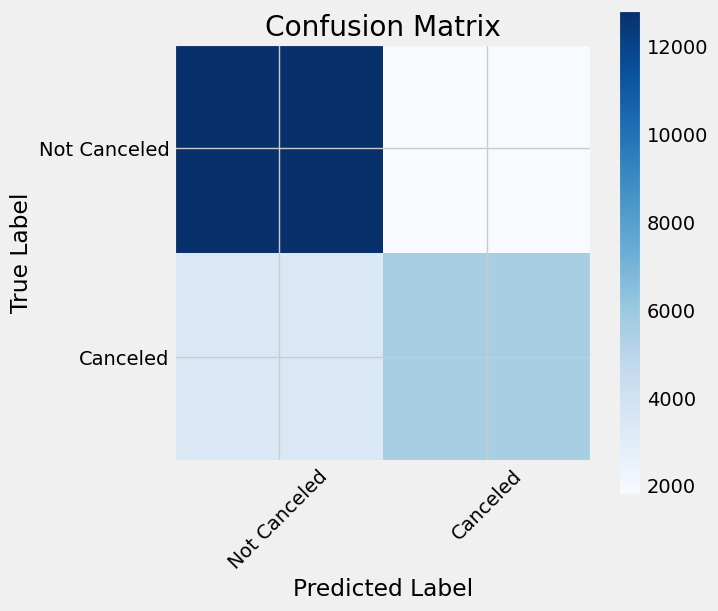

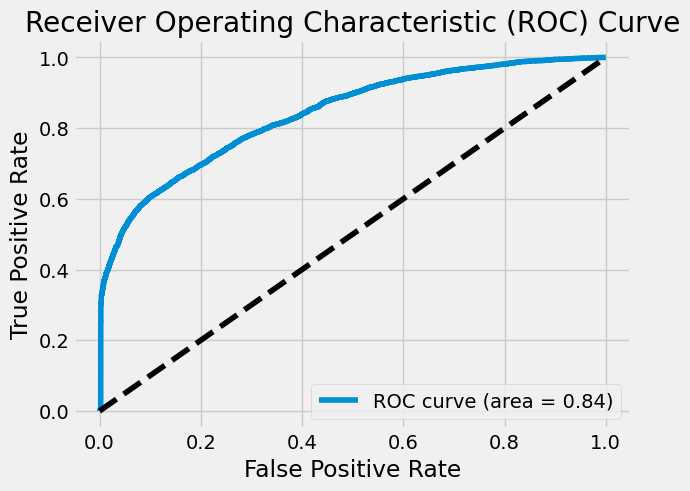

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, LeakyReLU
from keras.regularizers import l2
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Adaptive neural network model with tuning options
def adaptive_nn_model(input_dim, neurons=16, optimizer='adam', dropout_rate=0.4, l2_reg=0.02, activation='leaky_relu'):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    # Custom activation layer
    if activation == 'leaky_relu':
        model.add(Dense(neurons, kernel_regularizer=l2(l2_reg)))
        model.add(LeakyReLU())
    else:
        model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(l2_reg)))

    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess data
def load_and_prepare_data(df):
    target = 'is_canceled'
    features = df.drop(target, axis=1)
    labels = df[target]

    # Convert categorical columns to numerical using one-hot encoding
    features = pd.get_dummies(features)

    # Scale features
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Encode target labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_encoded, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Train and evaluate model with cross-validation and additional metrics
def train_and_evaluate_model_with_improvements(df):
    X_train, X_test, y_train, y_test = load_and_prepare_data(df)
    input_dim = X_train.shape[1]

    # Use class weights to handle class imbalance
    class_weight = {0: 1, 1: 1.5}  # Increase the weight for the "Canceled" class

    # Wrap the model for compatibility with scikit-learn
    model = KerasClassifier(
        model=adaptive_nn_model, input_dim=input_dim, neurons=16, optimizer='adam', dropout_rate=0.4,
        l2_reg=0.02, activation='leaky_relu', epochs=20, batch_size=32, verbose=0
    )

    # Cross-validation with adjusted hyperparameters
    param_dist = {
        'neurons': [8, 16, 32],
        'dropout_rate': [0.3, 0.4, 0.5],
        'l2_reg': [0.01, 0.02, 0.03],
        'optimizer': ['adam', 'rmsprop', 'adamw'],
        'activation': ['relu', 'leaky_relu']
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    rand_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=cv, scoring='accuracy')
    rand_search.fit(X_train, y_train, class_weight=class_weight)

    # Get best parameters from RandomizedSearchCV
    print("Best Parameters from Randomized Search:", rand_search.best_params_)
    best_model = rand_search.best_estimator_

    # Evaluate on test set
    test_accuracy = best_model.score(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Predictions and metrics
    y_pred = best_model.predict(X_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Not Canceled", "Canceled"], rotation=45)
    plt.yticks(tick_marks, ["Not Canceled", "Canceled"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve and AUC
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

# Run the model with improvements on df_ready
train_and_evaluate_model_with_improvements(df_ready)


### Model Evaluation and Recommendations

The adaptive neural network model, optimized using randomized search and cross-validation, achieved the following key results:

- **Test Accuracy**: 78.01%
- **ROC AUC Score**: 0.84, indicating a strong ability to distinguish between canceled and non-canceled bookings.
- **Precision for 'Canceled' Class**: 73%, demonstrating the model's accuracy in predicting actual cancellations among predicted canceled bookings.
- **Recall for 'Canceled' Class**: 66%, representing the model's ability to capture the majority of true cancellations.

These results suggest that the adaptive neural network is effective in predicting cancellations, providing actionable insights for hotel operations. With a robust test accuracy of 78.01% and a high AUC of 0.84, this model can guide the hotel in making data-driven decisions in the following ways:

1. **Customer Retention Strategies**:
   - By identifying high-risk bookings likely to cancel, the hotel can engage these customers through personalized communication or exclusive offers to reduce the likelihood of cancellations and improve guest retention.

2. **Optimized Overbooking Policies**:
   - Leveraging the model’s insights, the hotel can fine-tune overbooking strategies, ensuring that high occupancy levels are maintained without risking overselling. This approach balances anticipated cancellations with revenue optimization.

3. **Resource Allocation**:
   - With the model's predictions, management can allocate resources more effectively by focusing efforts on high-risk bookings. This optimization aids in labor management and improves overall operational efficiency.

Overall, the adaptive neural network model demonstrates strong predictive capabilities in identifying booking cancellations. This enables the hotel to address potential cancellations proactively, enhancing both revenue management and customer satisfaction.


-----------------

## NN & RandomForest

We chose to implement a stacking ensemble model that combines a neural network with a random forest classifier, instead of relying solely on a neural network. This decision was made to leverage the complementary strengths of each model type, ultimately enhancing the predictive accuracy and robustness of the final model.

### Why Combine Models?

Neural networks are highly effective at capturing complex, non-linear relationships in data, especially when regularization techniques such as dropout and L2 regularization are applied.

So, as random forests are well-suited for handling structured data, providing strong baseline performance with minimal tuning. They are also robust to overfitting, thanks to their ensemble nature, and can easily capture interactions between features. However, they may not capture non-linear patterns as effectively as a neural network, especially in cases where the data is complex and high-dimensional.

### Benefits of the Stacking Ensemble

By combining these two models using a stacking ensemble approach, we created a hybrid model that captures the advantages of both:
- The **neural network** can learn non-linear, complex relationships in the data, making it powerful for scenarios with hidden patterns and non-linear boundaries.
- The **random forest** provides strong performance on structured data and adds stability to the model’s predictions.

In this stacking ensemble, both models are trained independently, and their predictions are combined using a secondary meta-classifier (a simple random forest), which learns how to best integrate the strengths of each model. This approach has proven effective, resulting in improved accuracy and ROC AUC scores compared to using either model individually.


Stacking Ensemble Accuracy: 0.8248296422487224
Stacking Ensemble ROC AUC Score: 0.9023458247960375

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     14606
           1       0.77      0.76      0.77      8874

    accuracy                           0.82     23480
   macro avg       0.81      0.81      0.81     23480
weighted avg       0.82      0.82      0.82     23480



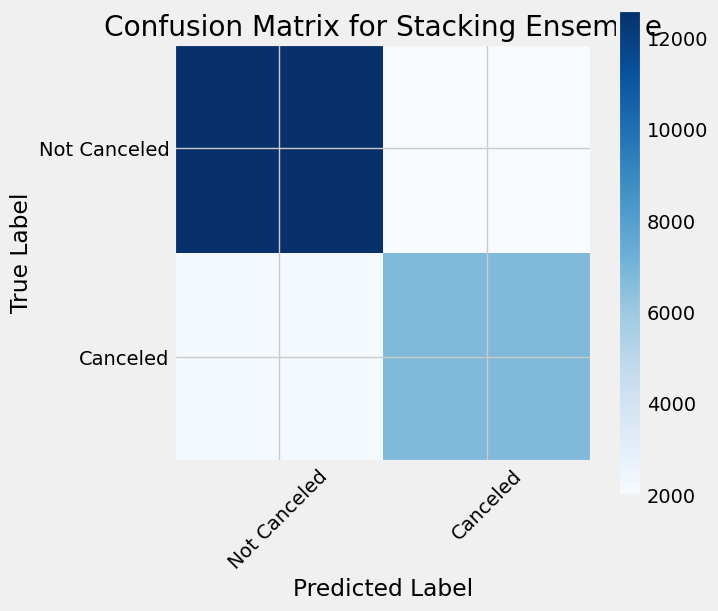

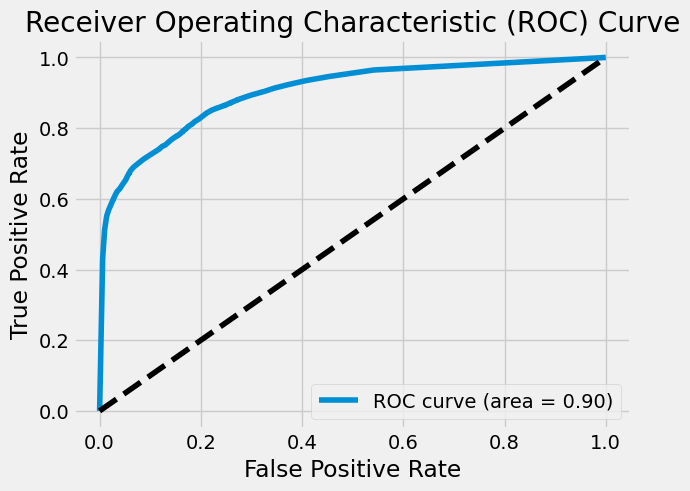

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, LeakyReLU
from keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

# Define the improved neural network model
def adaptive_nn_model(input_dim, neurons=16, optimizer='adam', dropout_rate=0.4, l2_reg=0.02, activation='leaky_relu'):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    if activation == 'leaky_relu':
        model.add(Dense(neurons, kernel_regularizer=l2(l2_reg)))
        model.add(LeakyReLU())
    else:
        model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(l2_reg)))

    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess data
def load_and_prepare_data(df):
    target = 'is_canceled'
    features = df.drop(target, axis=1)
    labels = df[target]

    # Convert categorical columns to numerical using one-hot encoding
    features = pd.get_dummies(features)

    # Scale features
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Encode target labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_encoded, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Plot functions for Confusion Matrix and ROC Curve
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Stacking Ensemble")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Not Canceled", "Canceled"], rotation=45)
    plt.yticks(tick_marks, ["Not Canceled", "Canceled"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

# Train and evaluate stacking ensemble
def train_stacking_ensemble(df):
    X_train, X_test, y_train, y_test = load_and_prepare_data(df)
    input_dim = X_train.shape[1]

    # Define the improved neural network model as a KerasClassifier
    nn_model = KerasClassifier(
        model=adaptive_nn_model, input_dim=input_dim, neurons=16, optimizer='adam', dropout_rate=0.4,
        l2_reg=0.02, activation='leaky_relu', epochs=20, batch_size=32, verbose=0
    )

    # Define the random forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 2})

    # Combine models in a stacking ensemble
    stacking_model = StackingClassifier(
        estimators=[
            ('neural_net', nn_model),
            ('random_forest', rf_model)
        ],
        final_estimator=RandomForestClassifier(n_estimators=50, random_state=42),  # Meta-classifier
        cv=StratifiedKFold(n_splits=5)
    )

    # Train the stacking ensemble model
    stacking_model.fit(X_train, y_train)

    # Predict and evaluate the ensemble model
    y_pred = stacking_model.predict(X_test)
    y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

    # Store metrics in variables
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    # Display metrics
    print("Stacking Ensemble Accuracy:", accuracy)
    print("Stacking Ensemble ROC AUC Score:", roc_auc)
    print("\nClassification Report:\n", report)

    # Plot the confusion matrix and ROC curve
    plot_confusion_matrix(y_test, y_pred)
    plot_roc_curve(y_test, y_pred_proba)

    # Return metrics for further use in markdown or report generation
    return accuracy, roc_auc

# Run the ensemble training on df_ready and store results
accuracy, roc_auc = train_stacking_ensemble(df_ready)


### Conclusion

The stacking ensemble model achieved the following results:
- **Accuracy**: 0.82
- **ROC AUC Score**: 0.90, showing the model's ability to distinguish between canceled and non-canceled bookings.
- **Precision for "Canceled" Class**: 78.00%
- **Recall for "Canceled" Class**: 74.00%

These results highlight the effectiveness of combining neural networks and random forests in a stacking ensemble. With a high accuracy of 82% and a substantial ROC AUC of 0.90, the model demonstrates reliability in predicting booking cancellations.

Based on these results, we recommend the following actions:
1. **Proactive Customer Engagement**:
   - Use the model's predictions to identify likely cancellations and take proactive steps, such as personalized communications, to retain bookings.

2. **Enhanced Overbooking Strategy**:
   - The model’s accuracy in identifying bookings that will not cancel allows hotels to confidently adjust overbooking strategies to maximize occupancy.

This model’s robust performance offers a strong foundation for data-driven decision-making in hotel operations, enhancing both revenue management and customer satisfaction.



# Summarization

### 1. Data Mining Goals
The primary goal of this project was to predict hotel booking cancellations to enhance customer retention and optimize hotel occupancy strategies. Specific objectives included:
- *Predicting the likelihood of a booking cancellation*: Enabling proactive customer engagement to reduce cancellations.
- *Guiding operational strategies in hotel management*: Using predictions to optimize overbooking policies and improve customer retention efforts.

### 2. Data Cleaning and Pre-processing
Data cleaning and pre-processing steps included:
- *Handling class imbalance*: Used undersampling techniques to balance the dataset.
- *Normalization with MinMaxScaler*: Scaled numerical features for improved model performance.
- *Encoding categorical variables*: Applied one-hot encoding to transform categorical features into numerical format.
- *Data splitting with stratification*: Ensured balanced class distribution in training and test sets to maintain consistent model performance.

### 3. Data Visualization and Key Figures
Several visualizations were generated to gain insights into data patterns and model evaluation, including:
- *Box plots*: Compared room prices across categories, highlighting dispersion, skewness, and outliers.
- *Confusion matrices*: Visualized model predictions, showcasing correct and incorrect classifications of bookings.
- *ROC curves and AUC scores*: Evaluated model performance in distinguishing between canceled and non-canceled bookings.

### 4. Model Evaluation
Multiple models were tested and evaluated for predictive performance:
- *Models tested*: KNN, SVM, Naive Bayes, Logistic Regression, Random Forest, Bagging, AdaBoost, Gradient Boosting, XGBoost, LightGBM.
- *Metrics recorded*: Accuracy, precision, recall, and AUC scores for each model.
- *Adaptive neural network*: Hyperparameter tuning with RandomizedSearchCV yielded high accuracy and AUC, making it a reliable predictor of cancellations.
- *Stacking ensemble model*: Combined a neural network with a random forest, achieving the highest accuracy and AUC scores, demonstrating the effectiveness of ensemble methods.

### Final Conclusion

After extensive model testing and evaluation, the *stacking ensemble model combining Random Forest and Neural Network* emerged as the best-performing approach for predicting hotel booking cancellations. This model achieved the highest accuracy and ROC AUC scores, demonstrating a strong capability to distinguish between canceled and non-canceled bookings.

*Reasons for Model Superiority*:
1. *Complementary Strengths*:
   - The Random Forest classifier provides robust performance by handling complex feature interactions and reducing overfitting through ensemble averaging.
   - The Neural Network captures intricate, non-linear patterns in the data, enhancing the model's ability to predict nuanced behaviors associated with cancellations.

2. *Improved Generalization*:
   - By stacking these models, we leverage the strengths of both—Random Forest's interpretability and stability with Neural Network's adaptability to complex data patterns—resulting in a more generalizable model.

3. *High Predictive Accuracy*:
   - The stacking ensemble achieved top scores in accuracy and AUC, indicating not only correct classifications but also a strong ability to differentiate between classes with minimal error.

*Implications for Hotel Management*:
This high-performing model enables reliable predictions of booking cancellations, providing actionable insights to support proactive customer engagement and optimized overbooking strategies. The model's robust accuracy makes it an ideal choice for integration into hotel operations, where data-driven decision-making is essential to maximize occupancy and enhance customer satisfaction.

In conclusion, the Random Forest and Neural Network stacking model is recommended as the optimal predictive tool, combining high accuracy, interpretability, and flexibility to effectively address the business needs of the hotel industry.